# Import Libraries

Looping through the files in the folder

In [1]:
import pandas as pd 
import numpy as np 
import re
import os #for reading files 
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pyarrow.parquet as pq #pip install pyarrow #library to deal with parquet data format
from dateutil import parser
from datetime import timedelta
import zipfile #to work with zipfiles
import seaborn as sns
import math 
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Directory where the text files are stored
directory = r'C:\Users\dell\Downloads\ILIAS_Elon_Musk_Tweets'

# Create an empty list
tweet_data=[]

# Iterate through the files 
for filename in os.listdir(directory):
    if filename.endswith('.txt'):  # Process only .txt files
        filepath = os.path.join(directory, filename)
        with open(filepath, 'r', encoding='utf-8') as file:
            tweet= file.read()
            tweet_data.append({'Tweet': tweet})

In [4]:
#We put the tweets into a pandas data frame to make the analysis easier
tweet_df= pd.DataFrame(tweet_data)

In [5]:
tweet_df

,Tweet
0,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
1,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
2,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
3,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
4,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
...,...
1595,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
1596,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
1597,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...
1598,TweetId\tText\tName\tScreenName\tUTC\tCreatedA...


# Data Cleaning

Our goal is to perform a textual analysis that allows us to get the data in a format that is more suitable for analysis and construct columns where we would get all the info seperated columns such as: TweetId	Text	Name	ScreenName	UTC	CreatedAt	Favorites	Retweets	Language	Client	TweetType	URLs	Hashtags	Mentions	MediaType	MediaURLs

In [12]:
#we seperate the tweets into seperate columns
tweet_df['Tweet']= tweet_df['Tweet'].str.replace('TweetId\tText\tName\tScreenName\tUTC\tCreatedAt\tFavorites\tRetweets\tLanguage\tClient\tTweetType\tURLs\tHashtags\tMentions\tMediaType\tMediaURLs', "")
tweet_df['Tweet']= tweet_df['Tweet'].str.replace('\n', "")

In [13]:
tweet_df[['TweetId', 'Text', 'Name', 'ScreenName', 'UTC', 'CreatedAt', 'Favorites', 
          'Retweets', 'Language', 'Client', 'TweetType', 'URLs', 'Hashtags', 'Mentions', 
          'MediaType', 'MediaURLs']]= tweet_df['Tweet'].str.split('\t', expand=True)

In [14]:
tweet_df.drop(['Tweet'], axis=1, inplace=True)

In [15]:
tweet_df.head()

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,TweetType,URLs,Hashtags,Mentions,MediaType,MediaURLs
0,1321513255332941824,@MachinePix Little crane: “Am I just a toy to ...,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
1,1331745833629470722,@EvaFoxU We will have special colors for new R...,Elon Musk,elonmusk,2020-11-25T23:45:24.000Z,Wed Nov 25 23:45:24 +0000 2020,3820,143,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
2,1349459692515434502,@NASASpaceflight Sea shanty tiktok takes it to...,Elon Musk,elonmusk,2021-01-13T20:53:57.000Z,Wed Jan 13 20:53:57 +0000 2021,4237,140,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
3,1390920049372897281,@ericrihlmann @Tesla @nbcsnl @TimesSquareNYC @...,Elon Musk,elonmusk,2021-05-08T06:42:36.000Z,Sat May 08 06:42:36 +0000 2021,13486,480,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,5,,
4,1390839584225955847,Cybertruck prototype in New York this weekend,Elon Musk,elonmusk,2021-05-08T01:22:52.000Z,Sat May 08 01:22:52 +0000 2021,272338,16591,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,


In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TweetId     1600 non-null   object
 1   Text        1600 non-null   object
 2   Name        1600 non-null   object
 3   ScreenName  1600 non-null   object
 4   UTC         1600 non-null   object
 5   CreatedAt   1600 non-null   object
 6   Favorites   1600 non-null   object
 7   Retweets    1600 non-null   object
 8   Language    1600 non-null   object
 9   Client      1600 non-null   object
 10  TweetType   1600 non-null   object
 11  URLs        1600 non-null   object
 12  Hashtags    1600 non-null   object
 13  Mentions    1600 non-null   object
 14  MediaType   1600 non-null   object
 15  MediaURLs   1600 non-null   object
dtypes: object(16)
memory usage: 200.1+ KB


In [27]:
tweet_df[tweet_df['Text'].str.contains(r'Little crane')]

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,TweetType,URLs,Hashtags,Mentions,MediaType,MediaURLs
0,1321513255332941824,@MachinePix Little crane: “Am I just a toy to you!?”,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone"""" rel=""""nofollow"""">Twitter for iPhone</a>""",Reply,,0,1,,


In [14]:
tweet_df.loc[340]

TweetId                                     1358648653573992450
Text          @itsALLrisky Doge appears to be inflationary, ...
Name                                                  Elon Musk
ScreenName                                             elonmusk
UTC                                    2021-02-08T05:27:36.000Z
CreatedAt                        Mon Feb 08 05:27:36 +0000 2021
Favorites                                                 15504
Retweets                                                   3567
Language                                                     en
Client        "<a href=""http://twitter.com/download/iphone"...
TweetType                                                 Reply
URLs                                                           
Hashtags                                                      0
Mentions                                                      1
MediaType                                                      
MediaURLs                               

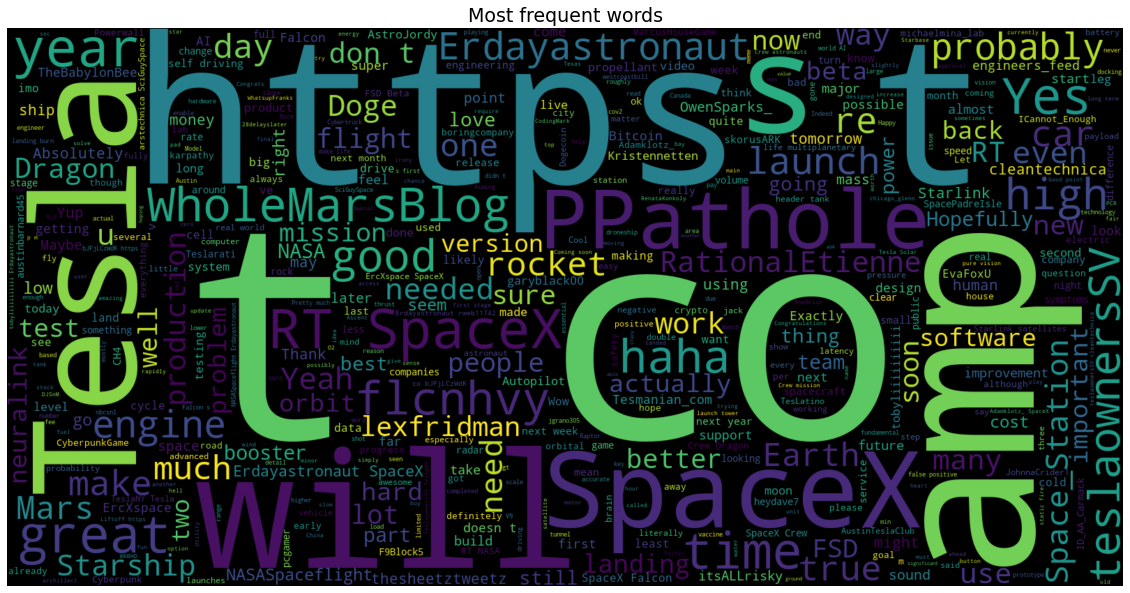

In [12]:
text = ' '.join([word for word in tweet_df['Text'] ])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words', fontsize=19)
plt.show()

In [17]:
#Function to clean the tweets

def cleanText(text):
    
    text= re.sub(r'@[A-Za-z0-9_]+.*?\b', '', text) #remove the mentions 
    text= re.sub(r'#', '', text) #removing hashtags 
    text= re.sub(r'RT[\s]+', '', text) #removing rt
    text= re.sub(r'https?:\/\/\S+', '', text) #remove hyperlink
    text = re.sub(r'[^\w\s,]', '', text) # remove emojis
    text = re.sub('\\n', '', text) # remove the '\n' character
    text = re.sub('^[\s]+|[\s]+$', '', text)
    text= re.sub('[^\x00-\x7F]+','', text)
    
    return text

#cleaning text
tweet_df['Text']= tweet_df['Text'].apply(cleanText)    

In [18]:
tweet_df

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,TweetType,URLs,Hashtags,Mentions,MediaType,MediaURLs
0,1321513255332941824,Little crane Am I just a toy to you,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
1,1331745833629470722,"We will have special colors for new Roadster, ...",Elon Musk,elonmusk,2020-11-25T23:45:24.000Z,Wed Nov 25 23:45:24 +0000 2020,3820,143,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
2,1349459692515434502,Sea shanty tiktok takes it to a new level with...,Elon Musk,elonmusk,2021-01-13T20:53:57.000Z,Wed Jan 13 20:53:57 +0000 2021,4237,140,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
3,1390920049372897281,Great pic,Elon Musk,elonmusk,2021-05-08T06:42:36.000Z,Sat May 08 06:42:36 +0000 2021,13486,480,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,5,,
4,1390839584225955847,Cybertruck prototype in New York this weekend,Elon Musk,elonmusk,2021-05-08T01:22:52.000Z,Sat May 08 01:22:52 +0000 2021,272338,16591,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1391164130204192771,Might still need a VPN in some countries,Elon Musk,elonmusk,2021-05-08T22:52:29.000Z,Sat May 08 22:52:29 +0000 2021,11331,659,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,
1596,1391130755787599881,Special link to view SNL outside USA,Elon Musk,elonmusk,2021-05-08T20:39:52.000Z,Sat May 08 20:39:52 +0000 2021,175011,27144,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,https://m.youtube.com/watch?v=VJX9ymv_vUQ&feat...,0,0,,
1597,1390955387654914052,First time a Falcon rocket booster will reach ...,Elon Musk,elonmusk,2021-05-08T09:03:01.000Z,Sat May 08 09:03:01 +0000 2021,95974,6651,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,https://twitter.com/spacex/status/139084323233...,0,0,,
1598,1390929314355548165,Yup,Elon Musk,elonmusk,2021-05-08T07:19:25.000Z,Sat May 08 07:19:25 +0000 2021,9159,538,und,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,


# Sentiment Analysis

To proceed further, we need to know the sentiment type of every tweet, that can be done using two ways:
a. Using NLTK's SentimentIntensityAnalyzer (We'll refer as SIA)
b. Using TextBlob

In [15]:
#Create a function to get the subjectivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [16]:
#Create two new columns to save the results of the created functions 
tweet_df['Subjectivity'] = tweet_df['Text'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['Text'].apply(getPolarity)

In [17]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
    if value < 0:
        return 'Negative'
    elif value > 0:
        return 'Positive'
    else:
        return 'Neutral'

In [18]:
# Create a new column 'Sentiment'
tweet_df['Text Blob Sentiment'] = tweet_df['Polarity'].apply(getSentiment)

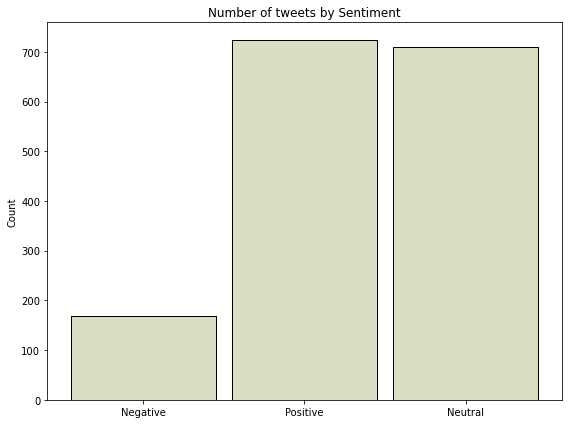

In [19]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(tweet_df, x = 'Text Blob Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

# Using VADER

In [20]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [22]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()
# Function to get sentiment scores for a text
def get_sentiment_scores(text):
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores
# Apply sentiment analysis to the 'Text' column and create new columns for scores
tweet_df['Sentiment_Scores'] = tweet_df['Text'].apply(get_sentiment_scores)

# Extract the compound sentiment score and add it as a new column
tweet_df['Compound_Score'] = tweet_df['Sentiment_Scores'].apply(lambda x: x['compound'])


In [23]:
# Define a threshold for sentiment labels
positive_threshold = 0.1
negative_threshold = -0.05

# Function to assign sentiment labels based on the compound score
def assign_sentiment_label(compound_score):
    if compound_score >= positive_threshold:
        return 'Positive'
    if compound_score <= negative_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment label assignment function to create a new 'Sentiment_Label' column
tweet_df['VADER Sentiment_Label'] = tweet_df['Compound_Score'].apply(assign_sentiment_label)
 # if compound_score <= negative_threshold:
  #      return 'negative'

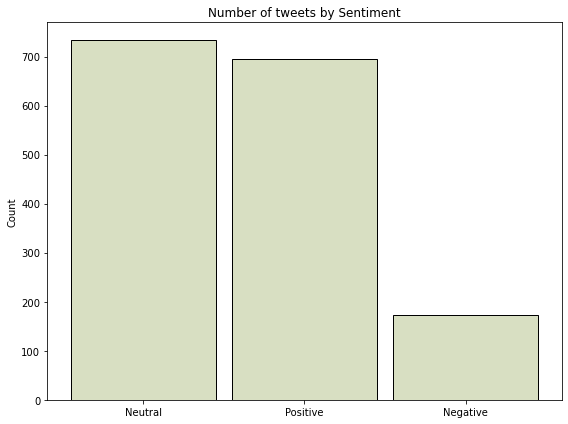

In [24]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(tweet_df, x = 'VADER Sentiment_Label', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

In [25]:
from sklearn.metrics import accuracy_score

# Assuming you have two columns 'VADER_Predictions' and 'TextBlob_Predictions'
vader_predictions = tweet_df['VADER Sentiment_Label']
textblob_predictions = tweet_df['Text Blob Sentiment']

# Calculate accuracy
accuracy = accuracy_score(vader_predictions, textblob_predictions)

In [22]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 188.2 kB/s eta 0:00:00m eta 0:00:010:00:02
Note: you may need to restart the kernel to use updated packages.


In [26]:
accuracy

0.671875

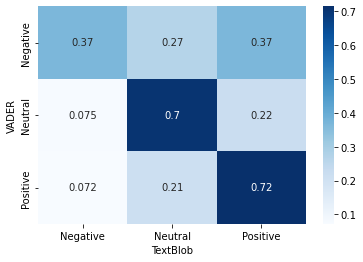

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
confusion_matrix = pd.crosstab(vader_predictions, textblob_predictions, rownames=['VADER'], colnames=['TextBlob'], normalize='index')

# Plot a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.show()

In [26]:
excel_file_path = 'tweet_df.xlsx'

# Use the to_excel() function to export the DataFrame to Excel
tweet_df.to_excel(excel_file_path, index=False) 

ModuleNotFoundError: No module named 'openpyxl'

In [30]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.7/619.9 MB 188.9 kB/s eta 0:40:31
ERROR: Exception:
Traceback (most recent call last):
  File "/usr/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 437, in _error_catcher
    yield
  File "/usr/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 560, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/site-packages/pip/_vendor/urllib3/response.py", line 526, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib64/python3.11/http/client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "/usr/lib

In [28]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 214.0 kB/s eta 0:00:00m eta 0:00:010:00:58
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 371.3 kB/s eta 0:00:001m395.9 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 358.9 kB/s eta 0:00:001m452.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 250.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 248.0 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 252.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 244.3 kB/s eta 0:00:00m eta 0:00:010:00:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 256.7 kB/s eta 0:00:001m275.5 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.4/311.4 kB 420.3 kB/s eta 0:00:000:00:010:00:01:01
     ━━

# Using roBERTa

In [28]:
from transformers import pipeline

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest", tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Perform sentiment analysis on the 'text' column
tweet_df['sentiment_analysis'] = tweet_df['Text'].apply(lambda x: sentiment_analyzer(x)[0])

# Print the DataFrame with sentiment analysis results

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [29]:
tweet_df.head()

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,...,Mentions,MediaType,MediaURLs,Subjectivity,Polarity,Text Blob Sentiment,Sentiment_Scores,Compound_Score,VADER Sentiment_Label,sentiment_analysis
0,1321513255332941824,Little crane Am I just a toy to you,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone""...",...,1,,,0.500000,-0.187500,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4202452600002289}"
1,1331745833629470722,"We will have special colors for new Roadster, ...",Elon Musk,elonmusk,2020-11-25T23:45:24.000Z,Wed Nov 25 23:45:24 +0000 2020,3820,143,en,"""<a href=""""http://twitter.com/download/iphone""...",...,1,,,0.591991,0.289502,Positive,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.6124,Positive,"{'label': 'neutral', 'score': 0.37615612149238..."
2,1349459692515434502,Sea shanty tiktok takes it to a new level with...,Elon Musk,elonmusk,2021-01-13T20:53:57.000Z,Wed Jan 13 20:53:57 +0000 2021,4237,140,en,"""<a href=""""http://twitter.com/download/iphone""...",...,1,,,0.277273,0.068182,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4044378399848938}"
3,1390920049372897281,Great pic,Elon Musk,elonmusk,2021-05-08T06:42:36.000Z,Sat May 08 06:42:36 +0000 2021,13486,480,en,"""<a href=""""http://twitter.com/download/iphone""...",...,5,,,0.750000,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive,"{'label': 'neutral', 'score': 0.428157240152359}"
4,1390839584225955847,Cybertruck prototype in New York this weekend,Elon Musk,elonmusk,2021-05-08T01:22:52.000Z,Sat May 08 01:22:52 +0000 2021,272338,16591,en,"""<a href=""""http://twitter.com/download/iphone""...",...,0,,,0.454545,0.136364,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.38310956954956..."


In [29]:
# Define a function to map sentiment labels
def map_sentiment_label(label_dict):
    label = label_dict['label'].lower()
    if label == 'negative':
        return 'Negative'
    elif label == 'positive':
        return 'Positive'
    elif label =='neutral':
        return 'Neutral'

# Apply the mapping function to create the 'roberta sentiment' column
tweet_df['roberta sentiment'] = tweet_df['sentiment_analysis'].apply(map_sentiment_label)

In [31]:
tweet_df.head()

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,...,MediaType,MediaURLs,Subjectivity,Polarity,Text Blob Sentiment,Sentiment_Scores,Compound_Score,VADER Sentiment_Label,sentiment_analysis,roberta sentiment
0,1321513255332941824,Little crane Am I just a toy to you,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone""...",...,,,0.500000,-0.187500,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4202452600002289}",Neutral
1,1331745833629470722,"We will have special colors for new Roadster, ...",Elon Musk,elonmusk,2020-11-25T23:45:24.000Z,Wed Nov 25 23:45:24 +0000 2020,3820,143,en,"""<a href=""""http://twitter.com/download/iphone""...",...,,,0.591991,0.289502,Positive,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.6124,Positive,"{'label': 'neutral', 'score': 0.37615612149238...",Neutral
2,1349459692515434502,Sea shanty tiktok takes it to a new level with...,Elon Musk,elonmusk,2021-01-13T20:53:57.000Z,Wed Jan 13 20:53:57 +0000 2021,4237,140,en,"""<a href=""""http://twitter.com/download/iphone""...",...,,,0.277273,0.068182,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4044378399848938}",Neutral
3,1390920049372897281,Great pic,Elon Musk,elonmusk,2021-05-08T06:42:36.000Z,Sat May 08 06:42:36 +0000 2021,13486,480,en,"""<a href=""""http://twitter.com/download/iphone""...",...,,,0.750000,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive,"{'label': 'neutral', 'score': 0.428157240152359}",Neutral
4,1390839584225955847,Cybertruck prototype in New York this weekend,Elon Musk,elonmusk,2021-05-08T01:22:52.000Z,Sat May 08 01:22:52 +0000 2021,272338,16591,en,"""<a href=""""http://twitter.com/download/iphone""...",...,,,0.454545,0.136364,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.38310956954956...",Neutral


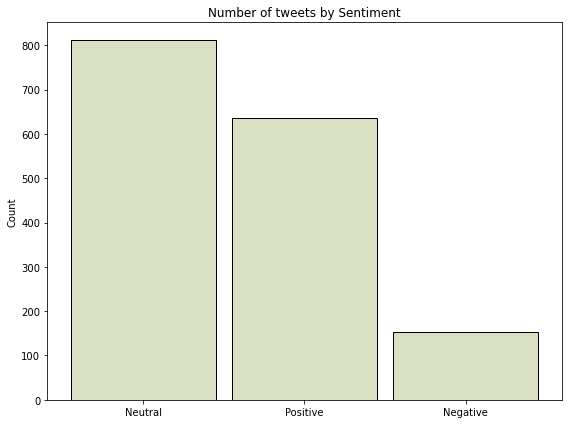

In [30]:
# Create a bar chart to count tweets according to its sentiment value

plt.figure(figsize = (8,6))

sns.histplot(tweet_df, x = 'roberta sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

In [31]:
#compare between vader and roberta
# Assuming you have two columns 'VADER_Predictions' and 'TextBlob_Predictions'
vader_predictions = tweet_df['VADER Sentiment_Label']
roberta_predictions = tweet_df['roberta sentiment']

# Calculate accuracy
accuracy = accuracy_score(vader_predictions, roberta_predictions)
accuracy

0.60125

In [32]:
#compare between textblob and roberta
# Assuming you have two columns 'VADER_Predictions' and 'TextBlob_Predictions'
textblob_predictions = tweet_df['Text Blob Sentiment']
roberta_predictions = tweet_df['roberta sentiment']

# Calculate accuracy
accuracy = accuracy_score(textblob_predictions, roberta_predictions)
accuracy

0.50875

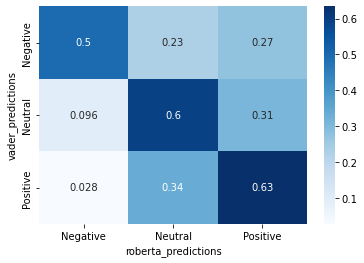

In [33]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(roberta_predictions, vader_predictions, rownames=['vader_predictions'], colnames=['roberta_predictions'], normalize='index')

# Plot a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.show()

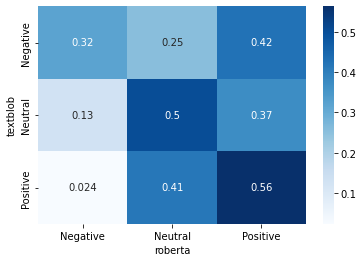

In [34]:
# Create a confusion matrix
confusion_matrix = pd.crosstab(roberta_predictions, textblob_predictions, rownames=['textblob'], colnames=['roberta'], normalize='index')

# Plot a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.show()

# Training Supervised Algorithms based on the results generated by Textblob

In [266]:
#We will drop the columns that are not useful for analysis 
tweet_df.drop(['Name', 'ScreenName', 'Favorites', 'Retweets', 'Language', 'URLs', 'Hashtags', 'Mentions', 'MediaType', 'MediaURLs', 'Client', 'UTC'], axis=1, inplace= True)

In [267]:
tweet_df.head()

,TweetId,Text,CreatedAt,TweetType,Subjectivity,Polarity,Text Blob Sentiment,Sentiment_Scores,Compound_Score,VADER Sentiment_Label,sentiment_analysis,roberta sentiment
0,1321513255332941824,Little crane Am I just a toy to you,Wed Oct 28 18:04:47 +0000 2020,Reply,0.500000,-0.187500,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.7565172910690308}",Neutral
1,1331745833629470722,"We will have special colors for new Roadster, ...",Wed Nov 25 23:45:24 +0000 2020,Reply,0.591991,0.289502,Positive,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.6124,Positive,"{'label': 'neutral', 'score': 0.6115485429763794}",Neutral
2,1349459692515434502,Sea shanty tiktok takes it to a new level with...,Wed Jan 13 20:53:57 +0000 2021,Reply,0.277273,0.068182,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4705999493598938}",Neutral
3,1390920049372897281,Great pic,Sat May 08 06:42:36 +0000 2021,Reply,0.750000,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive,"{'label': 'positive', 'score': 0.9168134927749...",Positive
4,1390839584225955847,Cybertruck prototype in New York this weekend,Sat May 08 01:22:52 +0000 2021,Tweet,0.454545,0.136364,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.8604921102523804}",Neutral


In [37]:
neg_tweets = tweet_df[tweet_df['roberta sentiment'] == 'Negative']

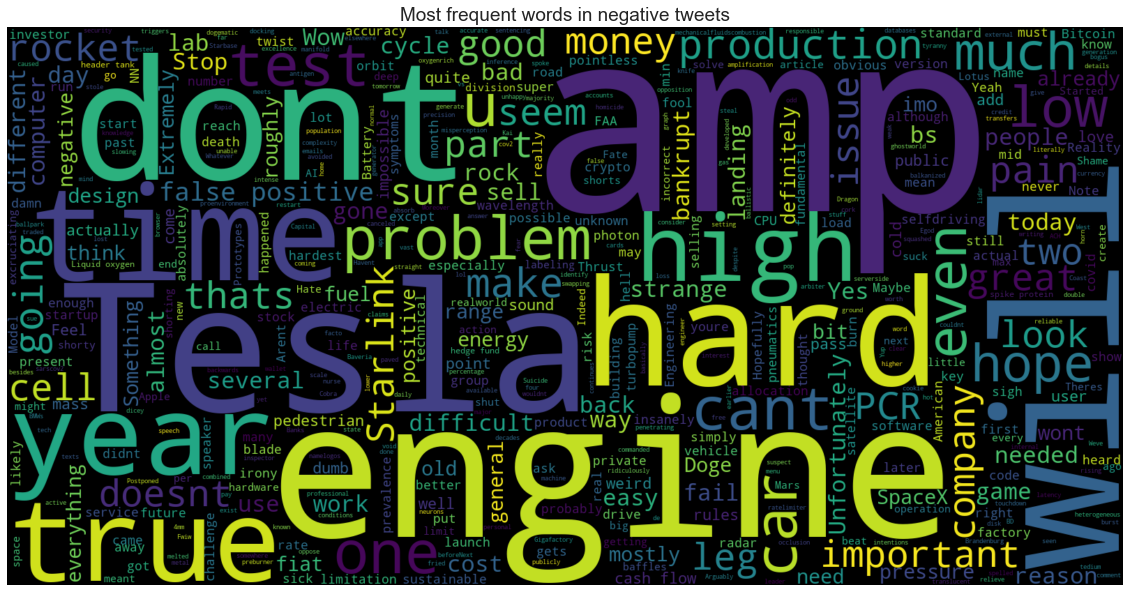

In [63]:
text = ' '.join([word for word in neg_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [66]:
neutral_tweets = tweet_df[tweet_df['roberta sentiment'] == 'Neutral']

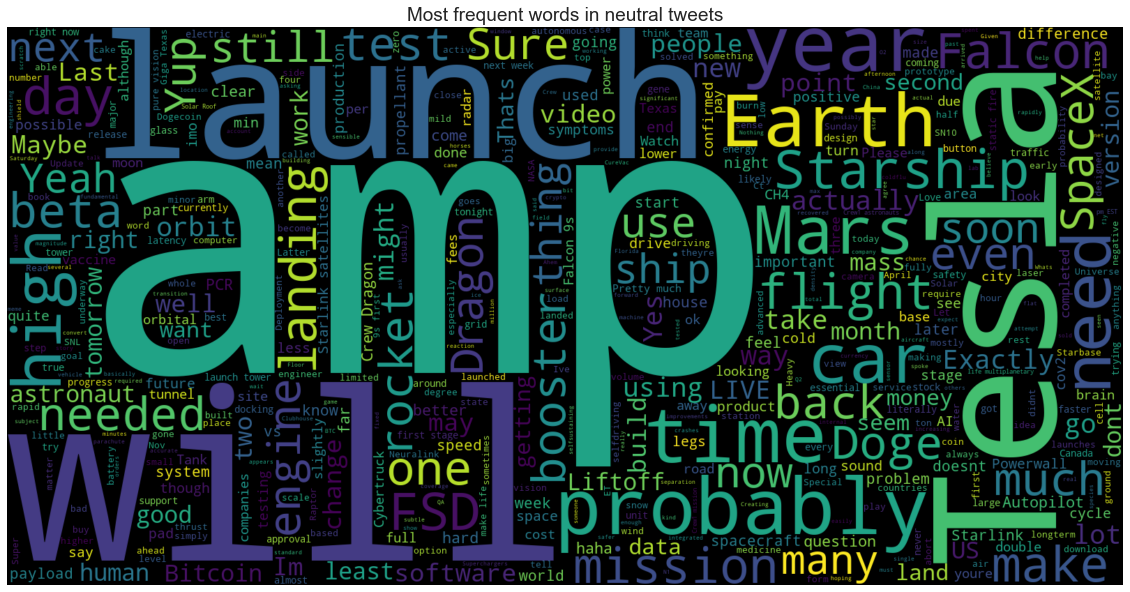

In [70]:
text = ' '.join([word for word in neutral_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [71]:
positive_tweets = tweet_df[tweet_df['roberta sentiment'] == 'Positive']

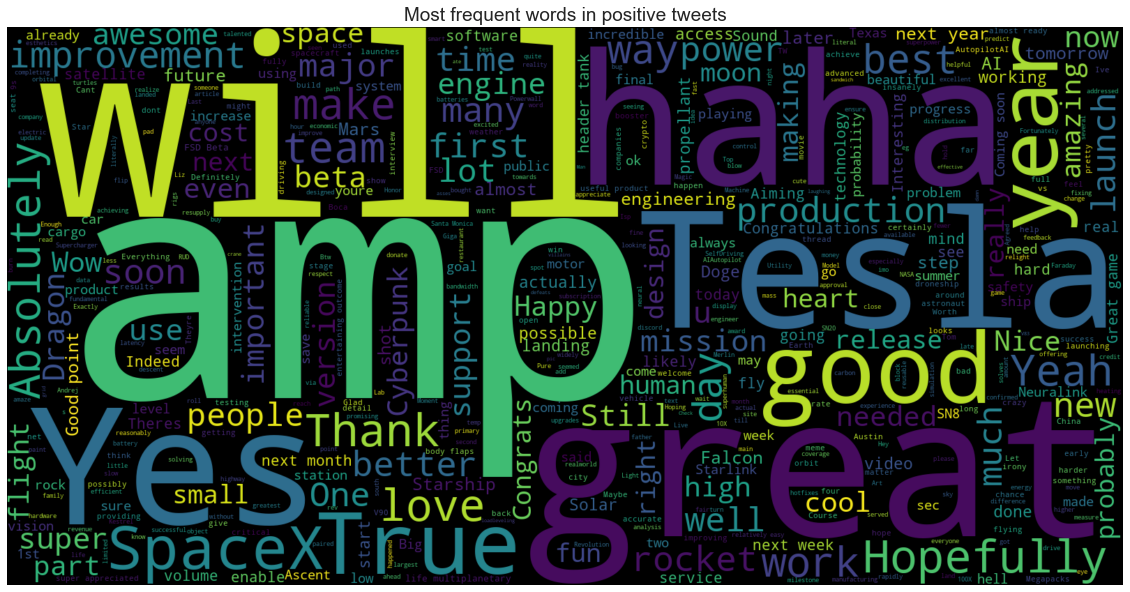

In [72]:
text = ' '.join([word for word in positive_tweets['Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
window_size = 3 #words in context
num_negative_samples = 3 
 

In [73]:
!pip install gensim

We start by performing word embedding using the Word2Vec algorithm and for that we need to first of all tokenize our tweets before passing them to the Word2Vec model in the gensim library

In [268]:
import gensim 
from gensim import corpora, models, similarities 
import spacy 

In [269]:
#This tokenizes, removes stop words, and puts all words in lowercase using some simple heuristics 
tweet_df['Tokens'] = tweet_df['Text'].apply(gensim.utils.simple_preprocess)

In [270]:
model= gensim.models.Word2Vec(
    window=1,
    min_count=5, 
)

In [271]:
text= tweet_df['Tokens']

In [272]:
model.build_vocab(tweet_df['Tokens'], progress_per=50)

In [273]:
model.train(text, total_examples= model.corpus_count, epochs= model.epochs)

(42979, 84370)

In [274]:
model.wv.similarity(w1='good', w2='bad') #reults don't seem to be good due to the nature of the data

0.94892305

In [285]:
text = tweet_df['Text']

In [45]:
pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 611.1 kB/s eta 0:00:000:00:010:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [47]:
tweet_df= pd.read_excel('/home/computerdell/Downloads/tweet_df2.xlsx')
tweet_df.head()

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,...,MediaType,MediaURLs,Subjectivity,Polarity,Text Blob Sentiment,Sentiment_Scores,Compound_Score,VADER Sentiment_Label,sentiment_analysis,roberta sentiment
0,1321513255332941824,Little crane Am I just a toy to you,Elon Musk,elonmusk,2020-10-28T18:04:47.000Z,Wed Oct 28 18:04:47 +0000 2020,1762,52,en,"""<a href=""""http://twitter.com/download/iphone""...",...,NaN,NaN,0.500000,-0.187500,Negative,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.7565172910690308}",Neutral
1,1331745833629470722,"We will have special colors for new Roadster, ...",Elon Musk,elonmusk,2020-11-25T23:45:24.000Z,Wed Nov 25 23:45:24 +0000 2020,3820,143,en,"""<a href=""""http://twitter.com/download/iphone""...",...,NaN,NaN,0.591991,0.289502,Positive,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.6124,Positive,"{'label': 'neutral', 'score': 0.6115485429763794}",Neutral
2,1349459692515434502,Sea shanty tiktok takes it to a new level with...,Elon Musk,elonmusk,2021-01-13T20:53:57.000Z,Wed Jan 13 20:53:57 +0000 2021,4237,140,en,"""<a href=""""http://twitter.com/download/iphone""...",...,NaN,NaN,0.277273,0.068182,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.4705999493598938}",Neutral
3,1390920049372897281,Great pic,Elon Musk,elonmusk,2021-05-08T06:42:36.000Z,Sat May 08 06:42:36 +0000 2021,13486,480,en,"""<a href=""""http://twitter.com/download/iphone""...",...,NaN,NaN,0.750000,0.800000,Positive,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive,"{'label': 'positive', 'score': 0.9168134927749...",Positive
4,1390839584225955847,Cybertruck prototype in New York this weekend,Elon Musk,elonmusk,2021-05-08T01:22:52.000Z,Sat May 08 01:22:52 +0000 2021,272338,16591,en,"""<a href=""""http://twitter.com/download/iphone""...",...,NaN,NaN,0.454545,0.136364,Positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"{'label': 'neutral', 'score': 0.8604921102523804}",Neutral


In [51]:
tweet_df.dropna(subset=['Text'], inplace=True)

In [53]:
text= tweet_df['Text' ]

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
# Fit and transform the corpus to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(tweet_df['Text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
processed_features=tfidf_vectorizer.fit_transform(text).toarray()

In [55]:
tfidf_df

,000,002,060mph,10,100,1000,1000s,100k,100m,100x,...,youre,youtubereddit,youve,yup,zdf,zero,zeros,zerosumnegativesum,zip2,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
 #tfidf_vectorizer.vocabulary_

In [57]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(tfidf_df, tweet_df['roberta sentiment'], test_size=0.2, random_state=50, stratify=tweet_df['roberta sentiment'])

In [58]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier 
text_classifier= RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [59]:
predictions = text_classifier.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        31
     Neutral       0.66      0.93      0.77       162
    Positive       0.81      0.53      0.64       103

    accuracy                           0.70       296
   macro avg       0.49      0.49      0.47       296
weighted avg       0.64      0.70      0.65       296

0.6959459459459459


In [61]:
!pip install -U imbalanced-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 732.7 kB/s eta 0:00:00m eta 0:00:010:00:01


We need to deal with our imbalanced dataset and xill perform random 

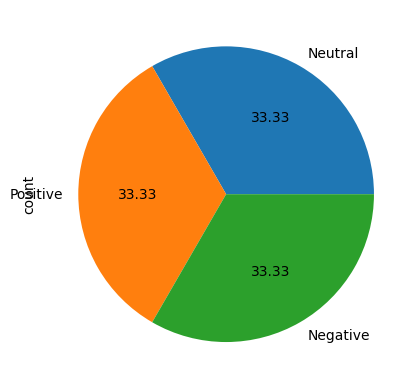

In [62]:
from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(sampling_strategy='not majority')
X_res, y_res = ros.fit_resample(tfidf_df, tweet_df['roberta sentiment'])

ax= y_res.value_counts().plot.pie(autopct='%.2f')

In [63]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.2, random_state=50)

In [64]:
#Using Random Forest 
from sklearn.ensemble import RandomForestClassifier 
text_classifier= RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [65]:
predictions = text_classifier.predict(X_test)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99       177
     Neutral       0.79      0.89      0.84       146
    Positive       0.92      0.79      0.85       164

    accuracy                           0.90       487
   macro avg       0.89      0.89      0.89       487
weighted avg       0.90      0.90      0.90       487

0.8952772073921971


Now we perform cross validation using GridSearchCV to see if we can further improve the performance of our model

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}


In [69]:
rf = RandomForestClassifier(random_state=42)

In [70]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=3)

In [71]:
grid_search.fit(X_train, y_train)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [89]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
best_estimator
best_params

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [95]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [96]:
predictions = text_classifier.predict(X_test)

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred ))
print(accuracy_score(y_test , y_pred ))

              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99       177
     Neutral       0.77      0.90      0.83       146
    Positive       0.91      0.77      0.83       164

    accuracy                           0.89       487
   macro avg       0.89      0.89      0.89       487
weighted avg       0.90      0.89      0.89       487

0.891170431211499


 ## Using SVM

In [81]:
from sklearn.svm import SVC

In [82]:
svm_classifier = SVC(kernel='linear')

In [88]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96       177
     Neutral       0.75      0.82      0.78       146
    Positive       0.88      0.76      0.82       164

    accuracy                           0.86       487
   macro avg       0.86      0.86      0.85       487
weighted avg       0.86      0.86      0.86       487

0.8603696098562629


In [97]:
# Define a grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],  # Relevant for 'poly' kernel
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1],  # Relevant for 'rbf' and 'sigmoid' kernels
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

In [98]:
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params_svm = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for predictions
best_svm_classifier = grid_search.best_estimator_
y_pred = best_svm_classifier.predict(X_test)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [99]:
print(classification_report(y_test,y_pred ))
accuracy = accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

    Negative       0.99      0.99      0.99       177
     Neutral       0.76      0.94      0.84       146
    Positive       0.95      0.75      0.84       164

    accuracy                           0.89       487
   macro avg       0.90      0.89      0.89       487
weighted avg       0.91      0.89      0.89       487



In [100]:
accuracy

0.893223819301848

# Filtering tweets that contain only words that refer to cryptocurrencies

In this part, we will filter out all the tweets in the dataframe to only keep those that mention cryptocurrencies. We start by defining the key words that refer to cryptos and then filter the data frame by those keywords

In [19]:
crypto_keywords = ["cryptocurrency", "bitcoin", "dogecoin", "crypto", "blockchain", "altcoin", "ethereum", 'ETH', 'doge', 'Ether', 'BTC', 'decentralized', 'blockchain', 'altcoin', 'dex', 'tokenization', 'wallet', 'exchange', 'token', 'mining', 'altcoins', 'digital currency', 'such wow', 'to the moon', 'Community Tipping', 'Lunar Missions']

In [20]:
filtered_tweets = tweet_df[tweet_df['Text'].str.contains('|'.join(crypto_keywords), case=False, regex=True)]

In [21]:
filtered_tweets.count()

TweetId       82
Text          82
Name          82
ScreenName    82
UTC           82
CreatedAt     82
Favorites     82
Retweets      82
Language      82
Client        82
TweetType     82
URLs          82
Hashtags      82
Mentions      82
MediaType     82
MediaURLs     82
dtype: int64

In [22]:
filtered_tweets.reset_index(inplace=True)
filtered_tweets.drop(['index'], axis=1, inplace= True) #to reset the index in order to be able to correctly do the concatenation later 

In [23]:
filtered_tweets.head(50)

,TweetId,Text,Name,ScreenName,UTC,CreatedAt,Favorites,Retweets,Language,Client,TweetType,URLs,Hashtags,Mentions,MediaType,MediaURLs
0,1370885153262817283,"Why are you so dogematic, they ask",Elon Musk,elonmusk,2021-03-13T23:51:05.000Z,Sat Mar 13 23:51:05 +0000 2021,246826,19492,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,
1,1370883943143251968,Origin of Doge Day AfternoonThe ancient Romans...,Elon Musk,elonmusk,2021-03-13T23:46:16.000Z,Sat Mar 13 23:46:16 +0000 2021,76871,7896,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,0,,
2,1370882536101056523,Doge day afternoon,Elon Musk,elonmusk,2021-03-13T23:40:41.000Z,Sat Mar 13 23:40:41 +0000 2021,176305,18884,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,
3,1368333982610251776,The Tesla FSD computer started shipping in vol...,Elon Musk,elonmusk,2021-03-06T22:53:38.000Z,Sat Mar 06 22:53:38 +0000 2021,3160,145,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,2,,
4,1368058884837928970,Doge spelled backwards is Egod,Elon Musk,elonmusk,2021-03-06T04:40:30.000Z,Sat Mar 06 04:40:30 +0000 2021,410295,38848,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,
5,1347858350717816832,"Yes, that would be the best way to do it A lar...",Elon Musk,elonmusk,2021-01-09T10:50:47.000Z,Sat Jan 09 10:50:47 +0000 2021,2698,128,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,2,,
6,1363272961684201472,Cryptocurrency explained,Elon Musk,elonmusk,2021-02-20T23:42:57.000Z,Sat Feb 20 23:42:57 +0000 2021,153609,23937,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,https://m.youtube.com/watch?v=YHjYt6Jm5j8,0,0,,
7,1363233627601989633,Or did they say pegged to the dollar Something...,Elon Musk,elonmusk,2021-02-20T21:06:39.000Z,Sat Feb 20 21:06:39 +0000 2021,111326,4259,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,0,,
8,1363230177002622976,Heard a rumor some crypto coin was pegging the...,Elon Musk,elonmusk,2021-02-20T20:52:56.000Z,Sat Feb 20 20:52:56 +0000 2021,275418,21115,en,"""<a href=""""http://twitter.com/download/iphone""...",Tweet,,0,0,,
9,1363046350900785156,I just set up some little Doge mining rigs wit...,Elon Musk,elonmusk,2021-02-20T08:42:28.000Z,Sat Feb 20 08:42:28 +0000 2021,55888,6793,en,"""<a href=""""http://twitter.com/download/iphone""...",Reply,,0,1,,


# Sentiment Analysis using cryptoBERT

In this part we perform an unsupervised sentiment analysis using the pre-trained ElKulako/cryptobert that has been trained on 3.2M cryptocurrency related social media posts. The model is based on the transformers architecture and classifies the tweets into 3 distinct categories: 
- Bullish: Positive outlook on the market 
- Neutral
- Bealish: Pessimistic outlook on the market

In order to perform the analysis we load the nlp pipeline, the classifier and the tokenizer

In [24]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length')
tweet_texts = filtered_tweets['Text'].tolist()
preds = pipe(tweet_texts)

KeyboardInterrupt: 

In [515]:
#put prediction into a dataframe
predictions_df = pd.DataFrame(preds, columns=['label', 'score'])

# Combine the original tweet DataFrame with the predictions DataFrame
result_df = pd.concat([filtered_tweets, predictions_df], axis=1)

In [516]:
#We will drop the columns that are not useful for analysis 
result_df.drop(['Name', 'ScreenName', 'Favorites', 'Retweets', 'Language', 'URLs', 'Hashtags', 'Mentions', 'MediaType', 'MediaURLs', 'Client', 'UTC'], axis=1, inplace= True)

In [517]:
#count the number of replies 
nb_of_replies= result_df['TweetType'].value_counts()
nb_of_replies

Reply      46
Tweet      34
Retweet     2
Name: TweetType, dtype: int64

In [518]:
#count the number of tweets that contain references to dogecoin
doge= ['dogecoin', 'doge', 'such wow', 'to the moon', 'Community Tipping', 'Lunar Missions']
doge = result_df[result_df['Text'].str.contains('|'.join(doge), case=False, regex=True)]
doge.count()
#We have identified that dogecoin related words occur 35 times

TweetId      35
Text         35
CreatedAt    35
TweetType    35
label        35
score        35
dtype: int64

In [519]:
#now we do the same for bitcoin
bitcoin_keywords= ['bitcoin', 'btc']
bitcoin = result_df[result_df['Text'].str.contains('|'.join(bitcoin_keywords), case=False, regex=True)]
bitcoin.count()
#We have identified 13 tweets that contain the word bitcoin

TweetId      13
Text         13
CreatedAt    13
TweetType    13
label        13
score        13
dtype: int64

In [520]:
#let's do the same for etherium
eth_keywords = ["ethereum", 'ETH']
eth_pattern = r'\b' + '|'.join(eth_keywords) + r'\b'
ethereum = result_df[result_df['Text'].str.contains(eth_pattern, case=False, regex=True)]
ethereum_count = ethereum.shape[0]  # Count of selected rows
print(ethereum_count)
ethereum.count()
#We will drop ethereum from the analysis as 2 tweets are not enough to access its impact on the etheureum market (Ante 2021)

2


TweetId      2
Text         2
CreatedAt    2
TweetType    2
label        2
score        2
dtype: int64

In [521]:
#Now we concatenate these new data frames into one that only contains bitcoin dogecoin and will not include etherum because it only includes 2 events
newfiltered_df = pd.concat([doge, bitcoin], axis=0)
newfiltered_df.count()

TweetId      48
Text         48
CreatedAt    48
TweetType    48
label        48
score        48
dtype: int64

In [522]:
#we will now add new columns in the data frame based on if certain keywords are present in the tweet 
#we will create a column for bitcoin, a column for eth, and a column for doge that take 1 if the tweet contains jargon related to it 
doge= ('dogecoin', 'doge', 'such wow', 'to the moon', 'Community Tipping', 'Lunar Missions')
bitcoin_keywords= ('bitcoin', 'btc', 'BTC')
newfiltered_df['Dogecoin'] = newfiltered_df['Text'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in doge) else 0)
newfiltered_df['Bitcoin'] = newfiltered_df['Text'].apply(lambda x: 1 if any(keyword in x.lower() for keyword in bitcoin_keywords) else 0)

In [523]:
newfiltered_df.reset_index(inplace=True)

In [524]:
newfiltered_df.drop(['index'], axis=1, inplace=True)

In [2]:
excel_file_path = r'C:\Users\dell\Desktop\Files Term Paper\Tweets about crypto Elon Musl.xlsx'  

# Read the Excel file into a pandas DataFrame
newfiltered_df = pd.read_excel(excel_file_path)

# Display the DataFrame
newfiltered_df.drop('Unnamed: 0', axis=1, inplace= True)

In [3]:
newfiltered_df.head()

,TweetId,Text,CreatedAt,TweetType,label,score,Dogecoin,Bitcoin
0,1370885153262817283,"Why are you so dogematic, they ask",Sat Mar 13 23:51:05 +0000 2021,Tweet,Bearish,0.401133,1,0
1,1370883943143251968,Origin of Doge Day AfternoonThe ancient Romans...,Sat Mar 13 23:46:16 +0000 2021,Reply,Bullish,0.736165,1,0
2,1370882536101056523,Doge day afternoon,Sat Mar 13 23:40:41 +0000 2021,Tweet,Bullish,0.684947,1,0
3,1368058884837928970,Doge spelled backwards is Egod,Sat Mar 06 04:40:30 +0000 2021,Tweet,Bullish,0.660561,1,0
4,1363046350900785156,I just set up some little Doge mining rigs wit...,Sat Feb 20 08:42:28 +0000 2021,Reply,Bullish,0.586527,1,0


In [4]:
#we now create 3 df based on the sentiments and concantenate to make sentiment an outer key
bearish_df = newfiltered_df[newfiltered_df['label']=='Bearish']
bullish_df = newfiltered_df[newfiltered_df['label']=='Bullish']
#sentiment_df=pd.concat([bearish_df, bullish_df, neutral_df], axis=0, keys=['Bearish', 'Bullish', 'Neutral'])

In [5]:
#In this part we parse each seperate data frame and transform the column createdat into a time column instead of a string object 

frames= [bearish_df, bullish_df]
for x in frames:
    x.loc[:,'CreatedAt']=x['CreatedAt'].apply(lambda x: parser.parse(x))

In [30]:
#The conversion is successful as we see that the CreatedAt column is a datetime object in pandas
bearish_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 46
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype                  
---  ------     --------------  -----                  
 0   TweetId    6 non-null      int64                  
 1   Text       6 non-null      object                 
 2   CreatedAt  6 non-null      datetime64[ns, tzutc()]
 3   TweetType  6 non-null      object                 
 4   label      6 non-null      object                 
 5   score      6 non-null      float64                
 6   Dogecoin   6 non-null      int64                  
 7   Bitcoin    6 non-null      int64                  
dtypes: datetime64[ns, tzutc()](1), float64(1), int64(3), object(3)
memory usage: 432.0+ bytes


In [6]:
#Now we need to format it
for x in frames:
    #we remove the time zone to make the data more suitable for further analysis
    x['Event Time']=x['CreatedAt'].dt.strftime('%Y-%m-%d %H:%M')
    #we convert the newly created date column into a date object
    x['Event Time']= pd.to_datetime(x['Event Time']) 
    #We drop the CreatedAt column
    x.drop(['CreatedAt'], axis=1, inplace= True)

In [7]:
#We sort the data frames by date in order to be able to cluster the event whithin 6 hours of each other
for x in frames: 
    x.sort_values(by= 'Event Time', inplace= True)

In [8]:
#we will sort each frame seperately and give it an event cluster
#we start by bearish frame 

time_window = timedelta(hours=6)
cluster_number = 1
last_event_time = bearish_df['Event Time'].iloc[0]

for index, row in bearish_df.iterrows():
    if (row['Event Time'] - last_event_time) >= time_window:
        cluster_number += 1
    bearish_df.at[index, 'Cluster'] = cluster_number
    last_event_time = row['Event Time']

#we obtain 5 events

In [9]:
#We do the same for bullish df

time_window = timedelta(hours=6)
cluster_number = 1
last_event_time = bullish_df['Event Time'].iloc[0]

for index, row in bullish_df.iterrows():
    if (row['Event Time'] - last_event_time) >= time_window:
        cluster_number += 1
    bullish_df.at[index, 'Cluster'] = cluster_number
    last_event_time = row['Event Time']

#we obtain 27 events events

In [10]:
#Here we verify the tweets that ended up in the same event cluster and give them the same event time to prepare them later for being matched with their respective event time series
#We do the same for the bullish df 
for index in range(1, len(bullish_df)):
    if bullish_df.iloc[index]['Cluster'] == bullish_df.iloc[index - 1]['Cluster']:
        bullish_df.loc[bullish_df.index[index], 'Event Time'] = bullish_df.iloc[index - 1]['Event Time']

In [11]:
#And also for the bearish df 
for index in range(1, len(bearish_df)):
    if bearish_df.iloc[index]['Cluster'] == bearish_df.iloc[index - 1]['Cluster']:
        bearish_df.loc[bearish_df.index[index], 'Event Time'] = bearish_df.iloc[index - 1]['Event Time']

In [186]:
bearish_df['Cluster'].unique()

array([1., 2., 3., 4., 5.])

In [37]:
bearish_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 46 to 0
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   TweetId     6 non-null      int64         
 1   Text        6 non-null      object        
 2   TweetType   6 non-null      object        
 3   label       6 non-null      object        
 4   score       6 non-null      float64       
 5   Dogecoin    6 non-null      int64         
 6   Bitcoin     6 non-null      int64         
 7   Event Time  6 non-null      datetime64[ns]
 8   Cluster     6 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 652.0+ bytes


# Some data analysis on the tweets 

First of all we can start by plotting a word cloud to see the most reoccuring themes in the tweets

In [536]:
sentiment_df=pd.concat([bearish_df, bullish_df], axis=0, keys=['Bearish', 'Bullish'])

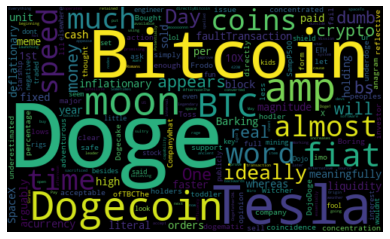

In [537]:
# Word Cloud 
allWords= ' '.join([tweets for tweets in sentiment_df['Text']])
wordCloud= WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [538]:
#get percentage of positive tweets
ptweets= sentiment_df[sentiment_df.label== 'Bullish']
ptweets= ptweets['Text']
print("We have", ptweets.shape[0]/ sentiment_df.shape[0]*100, "% Bullish tweets")

We have 87.5 % Bullish tweets


In [539]:
#get percentage of negative tweets
ptweets= sentiment_df[sentiment_df.label== 'Bearish']
ptweets= ptweets['Text']
print("We have", ptweets.shape[0]/ sentiment_df.shape[0]*100, "% Bearish tweets")

We have 12.5 % Bearish tweets


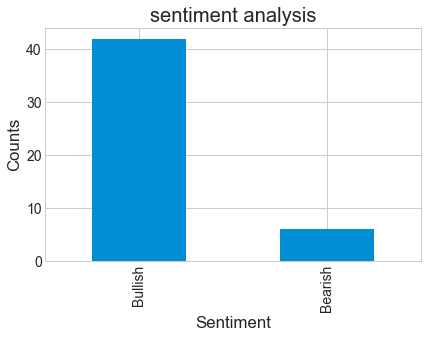

In [540]:
#show the value count 
sentiment_df['label'].value_counts()

#plot and visaluze the counts
plt.title('sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
sentiment_df['label'].value_counts().plot(kind= 'bar')
plt.show()


# Obtain the trading data information

In this part I have used a public dataset available on Kaggle that contains minute by minute trading data on all cryptocurrencies extracted from from Binance. https://www.kaggle.com/datasets/jorijnsmit/binance-full-history
I have extracted the tables I needed which are the ones for dogecoin and bitcoin to usd and will perform the necessary operations to convert them into a redable and ready for analysis pandas data frame

In [12]:
import zipfile
# Specify the path to the ZIP file containing the Parquet file
zip_file_path = r'C:\Users\dell\Desktop\Files Term Paper\BTC-USDT.parquet.zip'

# Extract the Parquet file from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_files")

# Path to the extracted Parquet file
parquet_file_path = "extracted_files/BTC-USDT.parquet"

# Read the Parquet file
table = pq.read_table(parquet_file_path)

# Convert the Parquet table to a Pandas DataFrame
df = table.to_pandas()


In [13]:
df['time']= df.index
df.reset_index(drop= True, inplace= True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753182 entries, 0 to 2753181
Data columns (total 10 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   open                          float32       
 1   high                          float32       
 2   low                           float32       
 3   close                         float32       
 4   volume                        float32       
 5   quote_asset_volume            float32       
 6   number_of_trades              uint16        
 7   taker_buy_base_asset_volume   float32       
 8   taker_buy_quote_asset_volume  float32       
 9   time                          datetime64[ns]
dtypes: datetime64[ns](1), float32(8), uint16(1)
memory usage: 110.3 MB


In [14]:
#we do the same for dogecoin 
# Specify the path to the ZIP file containing the Parquet file

zip_file_path = r'C:\Users\dell\Desktop\Files Term Paper\DOGE-USDT.parquet.zip'

# Extract the Parquet file from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_files")

# Path to the extracted Parquet file
parquet_file_path = "extracted_files/DOGE-USDT.parquet"

# Read the Parquet file
table = pq.read_table(parquet_file_path)

# Convert the Parquet table to a Pandas DataFrame
dogedf = table.to_pandas()

In [42]:
dogedf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768924 entries, 2019-07-05 12:00:00 to 2022-11-16 23:59:00
Data columns (total 9 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   open                          float32
 1   high                          float32
 2   low                           float32
 3   close                         float32
 4   volume                        float32
 5   quote_asset_volume            float32
 6   number_of_trades              uint16 
 7   taker_buy_base_asset_volume   float32
 8   taker_buy_quote_asset_volume  float32
dtypes: float32(8), uint16(1)
memory usage: 70.9 MB


In [15]:
dogedf['time']= dogedf.index
dogedf.reset_index(drop= True, inplace= True)

In [17]:
#Now we make the frames smaller in order to boost memeory and to more easily perform queries on them 
#Our tweet events frame starts on 2020-11-16 22:02:51 and ends on 2021-05-16 02:03:55 therefore we only need information starting on 2020-11-16 and ending on 2021-05-17

#convert the time column into time object for the bitcoin df
df['time'] = pd.to_datetime(df['time']) 

#convert the time column into time object for the dogecoin df
dogedf['time'] = pd.to_datetime(dogedf['time'])

#select the needed time for analysis for the 2 dfs
bitcoin_df = df[(df['time'] >= pd.to_datetime('2020-11-16')) & (df['time'] <= pd.to_datetime('2021-05-17'))]
bitcoin_df.drop(['volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'], axis=1, inplace= True)
doge_df = dogedf[(dogedf['time'] >= pd.to_datetime('2020-11-16')) & (dogedf['time'] <= pd.to_datetime('2021-05-17'))]
doge_df.drop(['volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'], axis=1, inplace= True)

In [18]:
#we start by begining to attribute each event date to its time series of events that are 361 minutes before and those that are 120 minutes after
#We start by bitcoin and the bullish df
window_before = pd.Timedelta(minutes=360)
window_after = pd.Timedelta(minutes=120)
relevant_data_list = []

for index, row in bullish_df[bullish_df['Bitcoin'] == 1].iterrows():
    event_date = pd.to_datetime(row['Event Time'])
    start_timestamp = event_date - window_before
    end_timestamp = event_date + window_after

    relevant_data = df[(df['time'] >= start_timestamp) & (df['time'] <= end_timestamp)].copy()
    relevant_data['Cluster'] = row['Cluster']  # Add the cluster information
    relevant_data['Event Time'] = (relevant_data['time'] - event_date).dt.total_seconds() / 60.0  # Calculate event time
    relevant_data_list.append(relevant_data)

combined_bullish_bitcoin = pd.concat(relevant_data_list, ignore_index=True)


In [19]:
#we do it for the bearish df and bitcoin
window_before = pd.Timedelta(minutes=360)
window_after = pd.Timedelta(minutes=120)
relevant_data_list = []

for index, row in bearish_df[bearish_df['Bitcoin']==1].iterrows():
    event_date = pd.to_datetime(row['Event Time'])
    start_timestamp = event_date - window_before
    end_timestamp = event_date + window_after

    relevant_data = df[(df['time'] >= start_timestamp) & (df['time'] <= end_timestamp)].copy()
    relevant_data['Cluster'] = row['Cluster']  # Add the cluster information
    relevant_data['Event Time'] = (relevant_data['time'] - event_date).dt.total_seconds() / 60.0  # Calculate event time
    relevant_data_list.append(relevant_data)

combined_bearish_bitcoin = pd.concat(relevant_data_list, ignore_index=True)

In [20]:
#we do the same for dogecoin now with all 3 categories 

#we start by bearish
window_before = pd.Timedelta(minutes=360)
window_after = pd.Timedelta(minutes=120)
relevant_data_list = []

for index, row in  bearish_df[bearish_df['Dogecoin']==1].iterrows():
    event_date = pd.to_datetime(row['Event Time'])
    start_timestamp = event_date - window_before
    end_timestamp = event_date + window_after

    relevant_data = doge_df[(doge_df['time'] >= start_timestamp) & (doge_df['time'] <= end_timestamp)].copy()
    relevant_data['Cluster'] = row['Cluster']  # Add the cluster information
    relevant_data['Event Time'] = (relevant_data['time'] - event_date).dt.total_seconds() / 60.0  # Calculate event time
    relevant_data_list.append(relevant_data)

combined_bearish_dogecoin = pd.concat(relevant_data_list, ignore_index=True)

#we do the same for bullish
window_before = pd.Timedelta(minutes=360)
window_after = pd.Timedelta(minutes=120)
relevant_data_list = []

for index, row in bullish_df[bullish_df['Dogecoin']==1].iterrows():
    event_date = pd.to_datetime(row['Event Time'])
    start_timestamp = event_date - window_before
    end_timestamp = event_date + window_after

    relevant_data = doge_df[(doge_df['time'] >= start_timestamp) & (doge_df['time'] <= end_timestamp)].copy()
    relevant_data['Cluster'] = row['Cluster']  # Add the cluster information
    relevant_data['Event Time'] = (relevant_data['time'] - event_date).dt.total_seconds() / 60.0  # Calculate event time
    relevant_data_list.append(relevant_data)

combined_bullish_dogecoin = pd.concat(relevant_data_list, ignore_index=True)


In [21]:
combined_bullish_dogecoin.head()

,open,high,low,close,time,Cluster,Event Time
0,0.002905,0.002911,0.002901,0.002911,2020-11-17 12:45:00,2.0,-360.0
1,0.002905,0.002911,0.002896,0.002905,2020-11-17 12:46:00,2.0,-359.0
2,0.002900,0.002906,0.002900,0.002902,2020-11-17 12:47:00,2.0,-358.0
3,0.002902,0.002906,0.002902,0.002906,2020-11-17 12:48:00,2.0,-357.0
4,0.002906,0.002913,0.002906,0.002907,2020-11-17 12:49:00,2.0,-356.0


In [22]:
combined_bullish_dogecoin[combined_bullish_dogecoin['Cluster']==2]

,open,high,low,close,time,Cluster,Event Time
0,0.002905,0.002911,0.002901,0.002911,2020-11-17 12:45:00,2.0,-360.0
1,0.002905,0.002911,0.002896,0.002905,2020-11-17 12:46:00,2.0,-359.0
2,0.002900,0.002906,0.002900,0.002902,2020-11-17 12:47:00,2.0,-358.0
3,0.002902,0.002906,0.002902,0.002906,2020-11-17 12:48:00,2.0,-357.0
4,0.002906,0.002913,0.002906,0.002907,2020-11-17 12:49:00,2.0,-356.0
...,...,...,...,...,...,...,...
476,0.002935,0.002940,0.002935,0.002939,2020-11-17 20:41:00,2.0,116.0
477,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:42:00,2.0,117.0
478,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:43:00,2.0,118.0
479,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:44:00,2.0,119.0


# Event Study

In [23]:
#We sart by calculating actual returns for each minute 
#we do so by using the formule where returns= close price-close price.lag(1)/close price.lag(1)
def calculate_returns(frame):
    frame.loc[:,'Return'] = (np.log(frame['close'] / frame['close'].shift(1)))
    frame.loc[:,'Percentage_Return'] = frame['Return'] * 100 
    return frame

The simplest method for constructing expected returns (apart fron1 setting
them to zero) is to assume a constant rnean return, so that the expected return is
simply the average return for each stock i calc~lated at the same frequency over the
estimation window, which we might term R;. Brown and Warner (1980, 1985)
conduct a simulation experiment to compare methods of estimating expected
returns for event studies. They find that an approach simply using historical return
averages outperforms many more complicated approaches because of the estimation
error that cornes with the latter

# Approach using constant mean return

In [108]:
#combined_bearish_bitcoin=copy_combined_bearish_bitcoin

In [24]:
#We group clusters of events together in order to calculate the returns for each cluster seperately
result_list=[]
for cluster, group_data in combined_bearish_bitcoin.groupby('Cluster'):
    cluster_data_with_returns = calculate_returns(group_data)
    result_list.append(cluster_data_with_returns)
#We put the data from the list in the dataframe 
combined_bearish_bitcoin = pd.concat(result_list, ignore_index=True)

In [44]:
#combined_bearish_bitcoin #the data frame now has a return column and a percentage return column 

In [25]:
#to verify if the operation worked as we intended it to, we check the number of null values we have in the 2 columns. 
#The number of null values should match the number of clusters that we have as for the first row in each cluster we have no previous lagged value
#We see that the operation worked as intended
combined_bearish_bitcoin.isnull().sum() 

open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
time                            0
Cluster                         0
Event Time                      0
Return                          2
Percentage_Return               2
dtype: int64

In [26]:
#We we repeat the operation to calculate returns for all data frame 
#we start by the dataframes for bitcoin
result_list=[]
for cluster, group_data in combined_bullish_bitcoin.groupby('Cluster'):
    cluster_data_with_returns = calculate_returns(group_data)
    result_list.append(cluster_data_with_returns)
#We put the data from the list in the dataframe 
combined_bullish_bitcoin = pd.concat(result_list, ignore_index=True)

#FOR DOGECOIN 
#for bearish doge
result_list=[]
for cluster, group_data in combined_bearish_dogecoin.groupby('Cluster'):
    cluster_data_with_returns = calculate_returns(group_data)
    result_list.append(cluster_data_with_returns)
#We put the data from the list in the dataframe 
combined_bearish_dogecoin = pd.concat(result_list, ignore_index=True)

#for bullish doge
result_list=[]
for cluster, group_data in combined_bullish_dogecoin.groupby('Cluster'):
    cluster_data_with_returns = calculate_returns(group_data)
    result_list.append(cluster_data_with_returns)
#We put the data from the list in the dataframe 
combined_bullish_dogecoin = pd.concat(result_list, ignore_index=True)


In [27]:
#to check that everything worked correctly for all
all_frames= [combined_bearish_bitcoin, combined_bullish_bitcoin, combined_bullish_dogecoin, combined_bearish_dogecoin ]
liste1=[]
for frame in all_frames:
    liste1.append(frame.isnull().sum())
liste1
#The number of missing values correspond with the number of events 

[open                            0
 high                            0
 low                             0
 close                           0
 volume                          0
 quote_asset_volume              0
 number_of_trades                0
 taker_buy_base_asset_volume     0
 taker_buy_quote_asset_volume    0
 time                            0
 Cluster                         0
 Event Time                      0
 Return                          2
 Percentage_Return               2
 dtype: int64,
 open                            0
 high                            0
 low                             0
 close                           0
 volume                          0
 quote_asset_volume              0
 number_of_trades                0
 taker_buy_base_asset_volume     0
 taker_buy_quote_asset_volume    0
 time                            0
 Cluster                         0
 Event Time                      0
 Return                          9
 Percentage_Return               9
 dtyp

Focus on the Bullish Events in Dogecoin

In [28]:
#We connstruct a data frame with the estimation window
bullish_dogecoin_estimation_window = combined_bullish_dogecoin[
    (combined_bullish_dogecoin['Event Time'] >= -300) &
    (combined_bullish_dogecoin['Event Time'] <= -60)
]
#We use the Mean return model over the estimation window to find the mean pourcentage return for each cluster
mean_returns_estimation_window = bullish_dogecoin_estimation_window.groupby('Cluster')['Percentage_Return'].mean()

In [29]:
# Map the cluster variances to the corresponding clusters in the DataFrame
mean_returns= mean_returns_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
combined_bullish_dogecoin['Mean Returns'] = combined_bullish_dogecoin['Cluster'].map(mean_returns)

In [30]:
combined_bullish_dogecoin[combined_bullish_dogecoin['Cluster']==2]

,open,high,low,close,time,Cluster,Event Time,Return,Percentage_Return,Mean Returns
0,0.002905,0.002911,0.002901,0.002911,2020-11-17 12:45:00,2.0,-360.0,NaN,NaN,0.003459
1,0.002905,0.002911,0.002896,0.002905,2020-11-17 12:46:00,2.0,-359.0,-0.002167,-0.216653,0.003459
2,0.002900,0.002906,0.002900,0.002902,2020-11-17 12:47:00,2.0,-358.0,-0.000895,-0.089548,0.003459
3,0.002902,0.002906,0.002902,0.002906,2020-11-17 12:48:00,2.0,-357.0,0.001240,0.123960,0.003459
4,0.002906,0.002913,0.002906,0.002907,2020-11-17 12:49:00,2.0,-356.0,0.000482,0.048173,0.003459
...,...,...,...,...,...,...,...,...,...,...
476,0.002935,0.002940,0.002935,0.002939,2020-11-17 20:41:00,2.0,116.0,0.001498,0.149805,0.003459
477,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:42:00,2.0,117.0,-0.000476,-0.047647,0.003459
478,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:43:00,2.0,118.0,0.000000,0.000000,0.003459
479,0.002938,0.002938,0.002938,0.002938,2020-11-17 20:44:00,2.0,119.0,0.000000,0.000000,0.003459


In [31]:
#We compute the abnormal returns as: Actual returns in % - Expected returns in % 
combined_bullish_dogecoin['Abnormal returns']= combined_bullish_dogecoin['Percentage_Return']-combined_bullish_dogecoin['Mean Returns']

In [82]:
filtered_combined_bullish_dogecoin['Event Time']

300      -60
301      -59
302      -58
303      -57
304      -56
        ... 
14816    116
14817    117
14818    118
14819    119
14820    120
Name: Event Time, Length: 5611, dtype: int64

In [32]:
#We connstruct a data frame with the event window
filtered_combined_bullish_dogecoin = combined_bullish_dogecoin[
    (combined_bullish_dogecoin['Event Time'] >= -60) &
    (combined_bullish_dogecoin['Event Time'] <= 120)
]

In [196]:
#We get the abnomal returns over the event window
grouped_aar1 = filtered_combined_bullish_dogecoin.groupby('Event Time')['Abnormal returns'].mean()
grouped_aar1

Event Time
-60     0.050222
-59    -0.037595
-58    -0.081945
-57    -0.007393
-56    -0.028477
          ...   
 116   -0.147844
 117   -0.103442
 118    0.051543
 119   -0.139736
 120   -0.285874
Name: Abnormal returns, Length: 181, dtype: float64

In [207]:
grouped_data = filtered_combined_bullish_dogecoin.groupby('Event Time')['Abnormal returns']

# Define a function to perform the Wilcoxon signed-rank test against 0 for a group
wilcoxon_test = lambda group: stats.wilcoxon(group).pvalue

# Apply the Wilcoxon test function to each group and get the p-value against 0
result = grouped_data.apply(wilcoxon_test)
result.loc[0:5]

Event Time
0    0.000006
1    0.000096
2    0.013525
3    0.569757
4    0.468322
5    0.517755
Name: Abnormal returns, dtype: float64

In [106]:
#HEDHA NON PARAMETRIC TEST
result.loc[0:20]

Event Time
0     0.000006
1     0.000096
2     0.013525
3     0.569757
4     0.468322
5     0.517755
6     0.084559
7     0.890871
8     0.921931
9     0.906383
10    0.021834
11    0.141555
12    0.019678
13    0.088152
14    0.421621
15    0.281026
16    0.492706
17    0.088152
18    0.968730
19    0.008628
20    0.480430
Name: Abnormal returns, dtype: float64

In [70]:
print(filtered_combined_bullish_dogecoin['Abnormal returns'].dtype)
print(filtered_combined_bullish_dogecoin['Event Time'].dtype)

float64
int64


In [65]:
print(filtered_combined_bullish_dogecoin['Abnormal returns'].dtype)


float64


In [221]:
pv= pd.Series(result)
pv

Event Time
-60     0.356938
-59     0.121520
-58     0.084559
-57     0.709591
-56     1.000000
          ...   
 116    0.018671
 117    0.216898
 118    0.202656
 119    0.738979
 120    0.247510
Name: Abnormal returns, Length: 181, dtype: float64

In [198]:
#We now get the t-stat for each abnormal return 
#To do that we first have to compute the variance that will be considered as the variance of the expected return over the estimation window
variance_estimation_window = bullish_dogecoin_estimation_window.groupby('Cluster')['Percentage_Return'].var()
variance_estimation_window

#Then we map the variance in the dataframe for the event period -60 to 120 
# Map the cluster variances to the corresponding clusters in the DataFrame
cluster_variances_map = variance_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
filtered_combined_bullish_dogecoin['Cluster Variance'] = filtered_combined_bullish_dogecoin['Cluster'].map(cluster_variances_map)

# Define a function to calculate 'test stat'
def calculate_test_stat(row):
    return row['Abnormal returns'] / np.sqrt(row['Cluster Variance'])

# Apply the function to each row and assign the result to a new column 'test stat'
filtered_combined_bullish_dogecoin.loc[:,'Test stat'] = filtered_combined_bullish_dogecoin.apply(calculate_test_stat, axis=1)

In [199]:
grouped_t = filtered_combined_bullish_dogecoin.groupby('Event Time')['Test stat'].mean()

In [200]:
#We conmpute the p-value corresponding to each t stat 
import scipy.stats as stats
Results_bullish_doge= pd.DataFrame([grouped_aar1, grouped_t])
Results_bullish_doge= Results_bullish_doge.transpose()
Results_bullish_doge['p_value'] = 2 * (1 - stats.t.cdf(abs(Results_bullish_doge['Test stat']), 24))

In [227]:
Results_bullish_doge.index = Results_bullish_doge.index.astype(float).astype(int)
Results_bullish_doge.loc[0:5]
Results_bullish_doge['Wilcoxon P-value']= pv
#We see that the Abnormal return are significant the moment a tweet occurs, 1 minute later and 2 minutes after

In [234]:
#Results_bullish_doge.drop(['Wilcoxon'], axis=1, inplace= True)
Results_bullish_doge.loc[0:10]

,Abnormal returns,Test stat,p_value,Wilcoxon P-value
Event Time,,,,
0,1.440003,6.486101,0.000001,0.000006
1,1.327316,5.359787,0.000017,0.000096
2,0.617570,2.142128,0.042537,0.013525
3,0.193146,-0.142121,0.888171,0.569757
4,0.225185,0.919033,0.367223,0.468322
5,-0.086290,0.329962,0.744292,0.517755
6,0.380814,1.149548,0.261657,0.084559
7,0.203188,0.747348,0.462113,0.890871
8,0.098375,0.318601,0.752785,0.921931


In [38]:
filtered_combined_bullish_dogecoin['Event Time'] = filtered_combined_bullish_dogecoin['Event Time'].astype(float).astype(int)

In [202]:
varAAR = Results_bullish_doge['Abnormal returns'].var()
subset = Results_bullish_doge.loc[0:1]
# Calculate cumulative sum of 'Abnormal returns' for the subset
subset['Cumulative Abnormal returns'] = subset['Abnormal returns'].cumsum()
CAR1= subset.loc[1,'Cumulative Abnormal returns']
tCAR1= CAR1/np.sqrt(varAAR*1)

#now CAR for 0:2 interval 
subset2 = Results_bullish_doge.loc[0:2]
subset2['Cumulative Abnormal returns'] = subset2['Abnormal returns'].cumsum()
CAR2= subset2.loc[2,'Cumulative Abnormal returns']
tCAR2= CAR2/np.sqrt(varAAR*2)

#now CAR  for 0:5 interval
subset5 = Results_bullish_doge.loc[0:5]
subset5['Cumulative Abnormal returns'] = subset5['Abnormal returns'].cumsum()
CAR5= subset5.loc[5,'Cumulative Abnormal returns']
tCAR5= CAR5/np.sqrt(varAAR*5)

#now CAR  for 0:30 interval
subset30 = Results_bullish_doge.loc[0:30]
subset30['Cumulative Abnormal returns'] = subset30['Abnormal returns'].cumsum()
CAR30= subset30.loc[30,'Cumulative Abnormal returns']
tCAR30= CAR30/np.sqrt(varAAR*30)


#now CAR  for 0:60 interval
subset60 = Results_bullish_doge.loc[0:60]
subset60['Cumulative Abnormal returns'] = subset60['Abnormal returns'].cumsum()
CAR60= subset60.loc[60,'Cumulative Abnormal returns']
tCAR60= CAR60/np.sqrt(varAAR*60)

#now CAR  for 0:120 interval
subset120 = Results_bullish_doge.loc[0:120]
subset120['Cumulative Abnormal returns'] = subset120['Abnormal returns'].cumsum()
CAR120= subset120.loc[120,'Cumulative Abnormal returns']
tCAR120= CAR120/np.sqrt(varAAR*120)

In [203]:
CAR_values = [CAR1, CAR2, CAR5, CAR30, CAR60, CAR120]
tCAR_values = [tCAR1, tCAR2, tCAR5, tCAR30, tCAR60, tCAR120]
intervals = [1, 2, 5, 30, 60, 120]

# Create a dictionary to store the data
data = {
    'Interval': intervals,
    'CAR': CAR_values,
    'tCAR': tCAR_values
}

# Create a DataFrame
CAR_bullish_doge = pd.DataFrame(data)

# Display the DataFrame
CAR_bullish_doge

#CAR is stastically significant for all intervals

,Interval,CAR,tCAR
0,1,2.767319,10.381946
1,2,3.384889,8.979435
2,5,3.716931,6.236186
3,30,6.538940,4.478848
4,60,5.546986,2.686588
5,120,3.538761,1.211938


In [204]:
from scipy import stats

# Initialize lists to store CAR and Wilcoxon test results
CAR_values_bullish_doge = []
wilcoxon_p_values_bullish_doge = []  # Initialize the list

intervals = [1, 2, 5, 30, 60, 120]

for interval in intervals:
    subset = Results_bullish_doge.loc[0:interval]
    subset['Cumulative Abnormal returns'] = subset['Abnormal returns'].cumsum()
    CAR = subset.loc[interval, 'Cumulative Abnormal returns']
    
    # Calculate the Wilcoxon test statistic and p-value
    _, p_value = stats.wilcoxon(subset['Abnormal returns'])
    
    CAR_values_bullish_doge.append(CAR)
    wilcoxon_p_values_bullish_doge.append(p_value)

# Create a dictionary to store the data for bullish DOGE
data_bullish_doge = {
    'Interval': intervals,
    'CAR': CAR_values_bullish_doge,
    'Wilcoxon p-value': wilcoxon_p_values_bullish_doge
}

# Create a DataFrame for bullish DOGE
CAR_wilcoxon_bullish_doge = pd.DataFrame(data_bullish_doge)

# Display the DataFrame for bullish DOGE
CAR_wilcoxon_bullish_doge


,Interval,CAR,Wilcoxon p-value
0,1,2.767319,0.500000
1,2,3.384889,0.250000
2,5,3.716931,0.062500
3,30,6.538940,0.006451
4,60,5.546986,0.096350
5,120,3.538761,0.611266


In [108]:
def wilcoxon_test(column):
    return stats.wilcoxon(column).pvalue

# Apply the Wilcoxon test function to "CAR" and "tCAR" columns
result_CAR = wilcoxon_test(data['CAR'])


0.03125

In [41]:
cumulative_abnormal_returns= Results_bullish_doge['Abnormal returns'].cumsum()

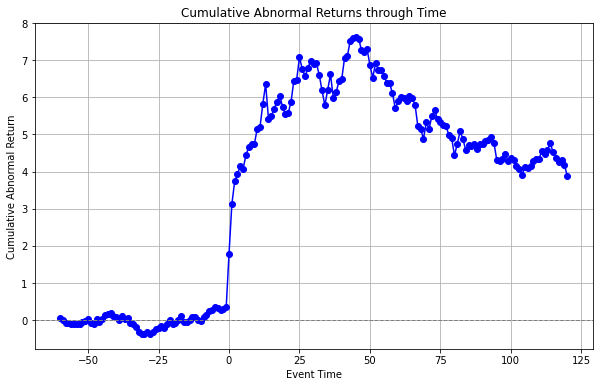

In [42]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = cumulative_abnormal_returns.index

# Plot cumulative abnormal returns
plt.figure(figsize=(10, 6))
plt.plot(time_array, cumulative_abnormal_returns, marker='o', linestyle='-', color='b')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Cumulative Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Cumulative Abnormal Return')
plt.grid(True)
plt.show()

In [570]:
grouped_aar= Results_bullish_doge['Abnormal returns']

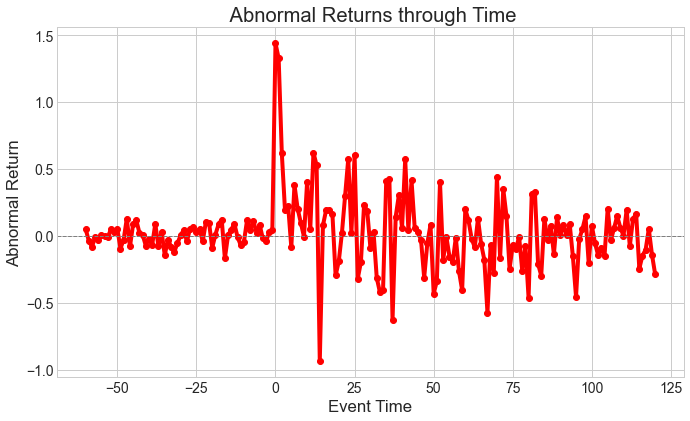

In [571]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = grouped_aar.index

# Plot abnormal returns 
plt.figure(figsize=(10, 6))
plt.plot(time_array, grouped_aar, marker='o', linestyle='-', color='r')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(' Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Abnormal Return')
plt.grid(True)
plt.show()

# For Bearish Dogecoin Events

In [235]:
#We connstruct a data frame with the estimation window
bearish_dogecoin_estimation_window = combined_bearish_dogecoin[
    (combined_bearish_dogecoin['Event Time'] >= -300) &
    (combined_bearish_dogecoin['Event Time'] <= -60)
]
#We use the Mean return model over the estimation window to find the mean pourcentage return for each cluster
mean_returns_estimation_window = bearish_dogecoin_estimation_window.groupby('Cluster')['Percentage_Return'].mean()

In [236]:
# Map the cluster variances to the corresponding clusters in the DataFrame
mean_returns= mean_returns_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
combined_bearish_dogecoin['Mean Returns'] = combined_bearish_dogecoin['Cluster'].map(mean_returns)

In [237]:
#We compute the abnormal returns as: Actual returns in % - Expected returns in % 
combined_bearish_dogecoin['Abnormal returns']= combined_bearish_dogecoin['Percentage_Return']-combined_bearish_dogecoin['Mean Returns']

In [238]:
#We connstruct a data frame with the event window
filtered_combined_bearish_dogecoin = combined_bearish_dogecoin[
    (combined_bearish_dogecoin['Event Time'] >= -60) &
    (combined_bearish_dogecoin['Event Time'] <= 120)
]

In [239]:
grouped_aar2 = filtered_combined_bearish_dogecoin.groupby('Event Time')['Abnormal returns'].mean()
grouped_aar2

Event Time
-60.0    -0.085770
-59.0    -0.074971
-58.0    -0.098497
-57.0    -0.272080
-56.0     0.015395
            ...   
 116.0   -0.145653
 117.0   -0.240406
 118.0   -0.051033
 119.0    0.030755
 120.0    0.235461
Name: Abnormal returns, Length: 181, dtype: float64

In [240]:
data= filtered_combined_bullish_dogecoin[filtered_combined_bullish_dogecoin['Cluster']==2]
statistic, p_value = stats.shapiro(data['Percentage_Return'])

# Check the p-value against a significance level (e.g., 0.05)
alpha = 0.05
if p_value > alpha:
    print("Sample data looks approximately normally distributed (fail to reject H0)")
else:
    print("Sample data does not follow a normal distribution (reject H0)")


Sample data does not follow a normal distribution (reject H0)


In [145]:
p_value

1.5929136907288921e-06

In [134]:
p_value 

3.941904724575322e-17

In [241]:
grouped_data = filtered_combined_bearish_dogecoin.groupby('Event Time')['Abnormal returns']

# Define a function to perform the Wilcoxon signed-rank test against 0 for a group
wilcoxon_test = lambda grouped_data: stats.wilcoxon(grouped_data).pvalue

# Apply the Wilcoxon test function to each group and get the p-value against 0
result_bearish = grouped_data.apply(wilcoxon_test)
result_bearish[0:10]

Event Time
0.0     0.125
1.0     0.250
2.0     0.375
3.0     0.625
4.0     0.250
5.0     0.125
6.0     0.250
7.0     0.375
8.0     0.250
9.0     0.250
10.0    0.875
Name: Abnormal returns, dtype: float64

In [242]:
be= pd.Series(result_bearish)

In [243]:
#We now get the t-stat for each abnormal return 
#To do that we first have to compute the variance that will be considered as the variance of the expected return over the estimation window
variance_estimation_window = bearish_dogecoin_estimation_window.groupby('Cluster')['Percentage_Return'].var()
variance_estimation_window

#Then we map the variance in the dataframe for the event period -60 to 120 
# Map the cluster variances to the corresponding clusters in the DataFrame
cluster_variances_map = variance_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
filtered_combined_bearish_dogecoin['Cluster Variance'] = filtered_combined_bearish_dogecoin['Cluster'].map(cluster_variances_map)

# Define a function to calculate 'test stat'
def calculate_test_stat(row):
    return row['Abnormal returns'] / np.sqrt(row['Cluster Variance'])

# Apply the function to each row and assign the result to a new column 'test stat'
filtered_combined_bearish_dogecoin.loc[:,'Test stat'] = filtered_combined_bearish_dogecoin.apply(calculate_test_stat, axis=1)

In [244]:
grouped_t2 = filtered_combined_bearish_dogecoin.groupby('Event Time')['Test stat'].mean()
grouped_t2[0:10]

Event Time
0.0      7.362894
1.0     13.403109
2.0      2.914477
3.0     -7.500557
4.0      2.661031
5.0      4.145111
6.0     -2.487724
7.0     -4.314325
8.0     -0.645073
9.0     -1.847824
10.0    -0.421459
Name: Test stat, dtype: float64

In [252]:
Results_bearish_doge= pd.DataFrame([grouped_aar2, grouped_t2])
Results_bearish_doge= Results_bearish_doge.transpose()
Results_bearish_doge['p_value'] = 2 * (1 - stats.t.cdf(abs(Results_bearish_doge['Test stat']), 2))

In [253]:
Results_bearish_doge['Wilcoxon P-value']=be


In [254]:
Results_bearish_doge.loc[0:10]

,Abnormal returns,Test stat,p_value,Wilcoxon P-value
Event Time,,,,
0.0,1.778092,7.362894,0.017951,0.125
1.0,3.381146,13.403109,0.005521,0.250
2.0,0.856575,2.914477,0.100323,0.375
3.0,-1.990476,-7.500557,0.017315,0.625
4.0,0.704143,2.661031,0.116959,0.250
5.0,1.079399,4.145111,0.053567,0.125
6.0,-0.571239,-2.487724,0.130654,0.250
7.0,-1.084687,-4.314325,0.049750,0.375
8.0,-0.194329,-0.645073,0.584998,0.250


#Now we compute the CARs and test their significance 

In [192]:
varAAR_bearish_doge = Results_bearish_doge['Abnormal returns'].var()
subset_bearish_doge = Results_bearish_doge.loc[0:1]
subset_bearish_doge['Cumulative Abnormal returns'] = subset_bearish_doge['Abnormal returns'].cumsum()
CAR1_bearish_doge = subset_bearish_doge.loc[1, 'Cumulative Abnormal returns']
tCAR1_bearish_doge = CAR1_bearish_doge / np.sqrt(varAAR_bearish_doge * 1)

subset2_bearish_doge = Results_bearish_doge.loc[0:2]
subset2_bearish_doge['Cumulative Abnormal returns'] = subset2_bearish_doge['Abnormal returns'].cumsum()
CAR2_bearish_doge = subset2_bearish_doge.loc[2, 'Cumulative Abnormal returns']
tCAR2_bearish_doge = CAR2_bearish_doge / np.sqrt(varAAR_bearish_doge * 2)

subset5_bearish_doge = Results_bearish_doge.loc[0:5]
subset5_bearish_doge['Cumulative Abnormal returns'] = subset5_bearish_doge['Abnormal returns'].cumsum()
CAR5_bearish_doge = subset5_bearish_doge.loc[5, 'Cumulative Abnormal returns']
tCAR5_bearish_doge = CAR5_bearish_doge / np.sqrt(varAAR_bearish_doge * 5)

subset30_bearish_doge = Results_bearish_doge.loc[0:30]
subset30_bearish_doge['Cumulative Abnormal returns'] = subset30_bearish_doge['Abnormal returns'].cumsum()
CAR30_bearish_doge = subset30_bearish_doge.loc[30, 'Cumulative Abnormal returns']
tCAR30_bearish_doge = CAR30_bearish_doge / np.sqrt(varAAR_bearish_doge * 30)

subset60_bearish_doge = Results_bearish_doge.loc[0:60]
subset60_bearish_doge['Cumulative Abnormal returns'] = subset60_bearish_doge['Abnormal returns'].cumsum()
CAR60_bearish_doge = subset60_bearish_doge.loc[60, 'Cumulative Abnormal returns']
tCAR60_bearish_doge = CAR60_bearish_doge / np.sqrt(varAAR_bearish_doge * 60)

subset120_bearish_doge = Results_bearish_doge.loc[0:120]
subset120_bearish_doge['Cumulative Abnormal returns'] = subset120_bearish_doge['Abnormal returns'].cumsum()
CAR120_bearish_doge = subset120_bearish_doge.loc[120, 'Cumulative Abnormal returns']
tCAR120_bearish_doge = CAR60_bearish_doge / np.sqrt(varAAR_bearish_doge * 120)

In [193]:
CAR_values_bearish_doge = [CAR1_bearish_doge, CAR2_bearish_doge, CAR5_bearish_doge, CAR30_bearish_doge, CAR60_bearish_doge, CAR120_bearish_doge]
tCAR_values_bearish_doge = [tCAR1_bearish_doge, tCAR2_bearish_doge, tCAR5_bearish_doge, tCAR30_bearish_doge, tCAR60_bearish_doge, tCAR120_bearish_doge]
intervals = [1, 2, 5, 30, 60, 120]

# Create a dictionary to store the data for bearish doge
data_bearish_doge = {
    'Interval': intervals,
    'CAR': CAR_values_bearish_doge,
    'tCAR': tCAR_values_bearish_doge
}

# Create a DataFrame for bearish doge
CAR_bearish_doge = pd.DataFrame(data_bearish_doge)

# Display the DataFrame
CAR_bearish_doge

# After an bearish event, t stat  is significant only up until 5 minnutes after the event

,Interval,CAR,tCAR
0,1,5.159238,12.009028
1,2,6.015813,9.901515
2,5,5.808879,6.046856
3,30,3.649803,1.551069
4,60,2.260229,0.679202
5,120,0.414030,0.480269


In [195]:
from scipy import stats

# Initialize lists to store CAR and Wilcoxon test results
CAR_values_bearish_doge = []
wilcoxon_p_values_bearish_doge = []  # Initialize the list

intervals = [1, 2, 5, 30, 60, 120]

for interval in intervals:
    subset = Results_bearish_doge.loc[0:interval]
    subset['Cumulative Abnormal returns'] = subset['Abnormal returns'].cumsum()
    CAR = subset.loc[interval, 'Cumulative Abnormal returns']
    
    # Calculate the Wilcoxon test statistic and p-value
    _, p_value = stats.wilcoxon(subset['Abnormal returns'])
    
    CAR_values_bearish_doge.append(CAR)
    wilcoxon_p_values_bearish_doge.append(p_value)

# Create a dictionary to store the data for bearish BTC
data_bearish_doge = {
    'Interval': intervals,
    'CAR': CAR_values_bearish_doge,
    'Wilcoxon p-value': wilcoxon_p_values_bearish_doge
}

# Create a DataFrame for bearish BTC
CAR_wilcoxon_bearish_doge = pd.DataFrame(data_bearish_doge)

# Display the DataFrame for bearish BTC
CAR_wilcoxon_bearish_doge


,Interval,CAR,Wilcoxon p-value
0,1,5.159238,0.500000
1,2,6.015813,0.250000
2,5,5.808879,0.312500
3,30,3.649803,0.844637
4,60,2.260229,0.524988
5,120,0.414030,0.123482


In [130]:
cumulative_abnormal_returns_bearish_doge = Results_bearish_doge['Abnormal returns'].cumsum()

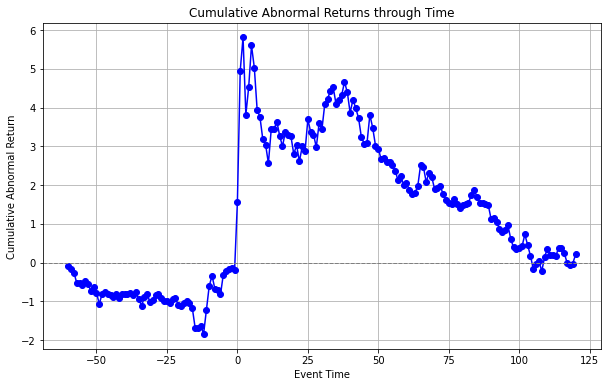

In [131]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = cumulative_abnormal_returns_bearish_doge.index

# Plot cumulative abnormal returns
plt.figure(figsize=(10, 6))
plt.plot(time_array, cumulative_abnormal_returns_bearish_doge, marker='o', linestyle='-', color='b')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Cumulative Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Cumulative Abnormal Return')
plt.grid(True)
plt.show()

In [585]:
grouped_aar_bearish_doge= Results_bearish_doge['Abnormal returns']

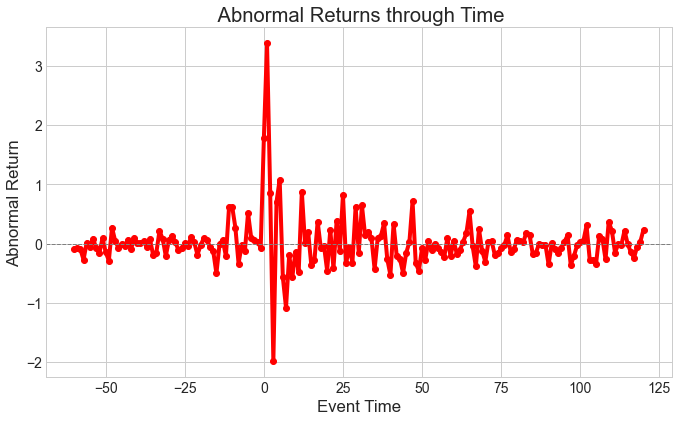

In [586]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = grouped_aar_bearish_doge.index

# Plot abnormal returns 
plt.figure(figsize=(10, 6))
plt.plot(time_array, grouped_aar_bearish_doge, marker='o', linestyle='-', color='r')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(' Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Abnormal Return')
plt.grid(True)
plt.show()

# Now we do the same for bitcoin bullish

In [147]:
#We connstruct a data frame with the estimation window
bullish_bitcoin_estimation_window = combined_bullish_bitcoin[
    (combined_bullish_bitcoin['Event Time'] >= -300) &
    (combined_bullish_bitcoin['Event Time'] <= -60)
]
#We use the Mean return model over the estimation window to find the mean pourcentage return for each cluster
mean_returns_estimation_window = bullish_bitcoin_estimation_window.groupby('Cluster')['Percentage_Return'].mean()

In [148]:
# Map the cluster variances to the corresponding clusters in the DataFrame
mean_returns= mean_returns_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
combined_bullish_bitcoin['Mean Returns'] = combined_bullish_bitcoin['Cluster'].map(mean_returns)

In [149]:
#We compute the abnormal returns as: Actual returns in % - Expected returns in % 
combined_bullish_bitcoin['Abnormal returns']= combined_bullish_bitcoin['Percentage_Return']-combined_bullish_bitcoin['Mean Returns']

In [150]:
#We connstruct a data frame with the event window
filtered_combined_bullish_bitcoin = combined_bullish_bitcoin[
    (combined_bullish_bitcoin['Event Time'] >= -60) &
    (combined_bullish_bitcoin['Event Time'] <= 120)
]

In [151]:
grouped_data = combined_bullish_bitcoin.groupby('Event Time')['Abnormal returns']

# Define a function to perform the Wilcoxon signed-rank test against 0 for a group
wilcoxon_test = lambda grouped_data: stats.wilcoxon(grouped_data).pvalue

# Apply the Wilcoxon test function to each group and get the p-value against 0
result_bearish = grouped_data.apply(wilcoxon_test)
result_bearish[0:10]

Event Time
0.0     0.305420
1.0     0.339600
2.0     0.541748
3.0     0.305420
4.0     0.068115
5.0     0.039795
6.0     1.000000
7.0     0.946045
8.0     0.454834
9.0     0.057373
10.0    0.587891
Name: Abnormal returns, dtype: float64

In [158]:
grouped_aar3 = filtered_combined_bullish_bitcoin.groupby('Event Time')['Abnormal returns'].mean()
grouped_aar3.loc[0:5]

Event Time
0.0   -0.028219
1.0    0.112415
2.0    0.039043
3.0   -0.091049
4.0    0.095111
5.0   -0.163170
Name: Abnormal returns, dtype: float64

In [159]:
#We now get the t-stat for each abnormal return 
#To do that we first have to compute the variance that will be considered as the variance of the expected return over the estimation window
variance_estimation_window = bullish_bitcoin_estimation_window.groupby('Cluster')['Percentage_Return'].var()
variance_estimation_window

#Then we map the variance in the dataframe for the event period -60 to 120 
# Map the cluster variances to the corresponding clusters in the DataFrame
cluster_variances_map = variance_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
filtered_combined_bullish_bitcoin['Cluster Variance'] =filtered_combined_bullish_bitcoin['Cluster'].map(cluster_variances_map)

# Define a function to calculate 'test stat'
def calculate_test_stat(row):
    return row['Abnormal returns'] / np.sqrt(row['Cluster Variance'])

# Apply the function to each row and assign the result to a new column 'test stat'
filtered_combined_bullish_bitcoin.loc[:,'Test stat'] = filtered_combined_bullish_bitcoin.apply(calculate_test_stat, axis=1)

In [160]:
grouped_t3 = filtered_combined_bullish_bitcoin.groupby('Event Time')['Test stat'].mean()
grouped_t3.head()

Event Time
-60.0   -0.150513
-59.0    0.008056
-58.0   -0.402790
-57.0   -0.159541
-56.0   -0.234852
Name: Test stat, dtype: float64

In [161]:
Results_bullish_btc= pd.DataFrame([grouped_aar3, grouped_t3])
Results_bullish_btc= Results_bullish_btc.transpose()
Results_bullish_btc['p_value'] = 2 * (1 - stats.t.cdf(abs(Results_bullish_btc['Test stat']), 8))

In [162]:
Results_bullish_btc.index = Results_bearish_doge.index.astype(float).astype(int)
Results_bullish_btc[0:5] #Results don't seem to be significant 

,Abnormal returns,Test stat,p_value
Event Time,,,
-60,-0.004042,-0.150513,0.884086
-59,0.008541,0.008056,0.993769
-58,-0.035761,-0.402790,0.697652
-57,-0.006664,-0.159541,0.877197
-56,-0.018826,-0.234852,0.820223


In [163]:
varAAR_btc = Results_bullish_btc['Abnormal returns'].var()
subset_btc = Results_bullish_btc.loc[0:1]
subset_btc['Cumulative Abnormal returns'] = subset_btc['Abnormal returns'].cumsum()
CAR1_btc = subset_btc.loc[1, 'Cumulative Abnormal returns']
tCAR1_btc = CAR1_btc / np.sqrt(varAAR_btc * 1)

subset2_btc = Results_bullish_btc.loc[0:2]
subset2_btc['Cumulative Abnormal returns'] = subset2_btc['Abnormal returns'].cumsum()
CAR2_btc = subset2_btc.loc[2, 'Cumulative Abnormal returns']
tCAR2_btc = CAR2_btc / np.sqrt(varAAR_btc * 2)

subset5_btc = Results_bullish_btc.loc[0:5]
subset5_btc['Cumulative Abnormal returns'] = subset5_btc['Abnormal returns'].cumsum()
CAR5_btc = subset5_btc.loc[5, 'Cumulative Abnormal returns']
tCAR5_btc = CAR5_btc / np.sqrt(varAAR_btc * 5)

subset30_btc = Results_bullish_btc.loc[0:30]
subset30_btc['Cumulative Abnormal returns'] = subset30_btc['Abnormal returns'].cumsum()
CAR30_btc = subset30_btc.loc[30, 'Cumulative Abnormal returns']
tCAR30_btc = CAR30_btc / np.sqrt(varAAR_btc * 30)

subset60_btc = Results_bullish_btc.loc[0:60]
subset60_btc['Cumulative Abnormal returns'] = subset60_btc['Abnormal returns'].cumsum()
CAR60_btc = subset60_btc.loc[60, 'Cumulative Abnormal returns']
tCAR60_btc = CAR60_btc / np.sqrt(varAAR_btc * 60)

subset120_btc = Results_bullish_btc.loc[0:120]
subset120_btc['Cumulative Abnormal returns'] = subset120_btc['Abnormal returns'].cumsum()
CAR120_btc = subset120_btc.loc[120, 'Cumulative Abnormal returns']
tCAR120_btc = CAR120_btc / np.sqrt(varAAR_btc * 120)

In [164]:
CAR_values_bullish_btc = [CAR1_btc, CAR2_btc, CAR5_btc, CAR30_btc, CAR60_btc, CAR120_btc]
tCAR_values_bullish_btc = [tCAR1_btc, tCAR2_btc, tCAR5_btc, tCAR30_btc, tCAR60_btc, tCAR120_btc]
intervals = [1, 2, 5, 30, 60, 120]

# Create a dictionary to store the data for bullish BTC
data_bullish_btc = {
    'Interval': intervals,
    'CAR': CAR_values_bullish_btc,
    'tCAR': tCAR_values_bullish_btc
}

# Create a DataFrame for bullish BTC
CAR_bullish_btc = pd.DataFrame(data_bullish_btc)

# Display the DataFrame for bullish BTC
CAR_bullish_btc

#Results are not stastitically significant 

,Interval,CAR,tCAR
0,1,0.084196,1.391396
1,2,0.123239,1.440094
2,5,-0.035869,-0.265092
3,30,-0.088550,-0.267170
4,60,0.486825,1.038618
5,120,0.231114,0.348654


In [166]:
CAR_values_bullish_btc = []
wilcoxon_p_values_bullish_btc = []  # Initialize the list

intervals = [1, 2, 5, 30, 60, 120]

for interval in intervals:
    subset = Results_bullish_btc.loc[0:interval]
    subset['Cumulative Abnormal returns'] = subset['Abnormal returns'].cumsum()
    CAR = subset.loc[interval, 'Cumulative Abnormal returns']
    
    # Calculate the Wilcoxon test statistic and p-value
    _, p_value = stats.wilcoxon(subset['Abnormal returns'])
    
    CAR_values_bullish_btc.append(CAR)
    wilcoxon_p_values_bullish_btc.append(p_value)

# Create a dictionary to store the data for bullish BTC
data_bullish_btc = {
    'Interval': intervals,
    'CAR': CAR_values_bullish_btc,
    'Wilcoxon p-value': wilcoxon_p_values_bullish_btc
}

# Create a DataFrame for bullish BTC
CAR_wilcoxon_bullish_btc = pd.DataFrame(data_bullish_btc)

# Display the DataFrame for bullish BTC
CAR_wilcoxon_bullish_btc

,Interval,CAR,Wilcoxon p-value
0,1,0.084196,1.000000
1,2,0.123239,0.500000
2,5,-0.035869,1.000000
3,30,-0.088550,0.921946
4,60,0.486825,0.312888
5,120,0.231114,0.974207


In [598]:
cumulative_abnormal_returns_bullish_btc = Results_bullish_btc['Abnormal returns'].cumsum()

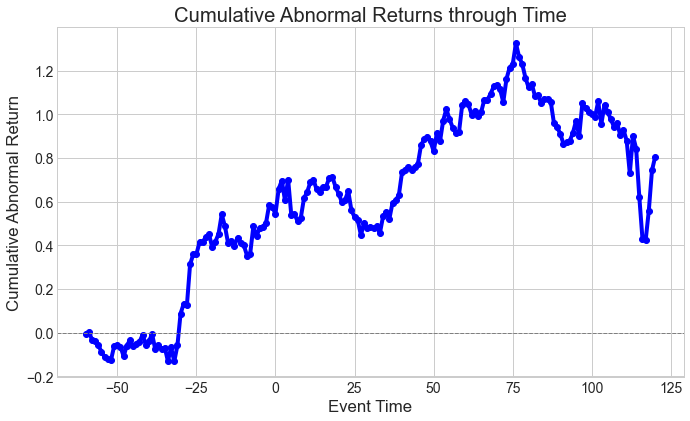

In [599]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = cumulative_abnormal_returns_bullish_btc.index

# Plot cumulative abnormal returns
plt.figure(figsize=(10, 6))
plt.plot(time_array, cumulative_abnormal_returns_bullish_btc, marker='o', linestyle='-', color='b')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Cumulative Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Cumulative Abnormal Return')
plt.grid(True)
plt.show()

In [600]:
grouped_aar_bullish_btc= Results_bullish_btc['Abnormal returns']

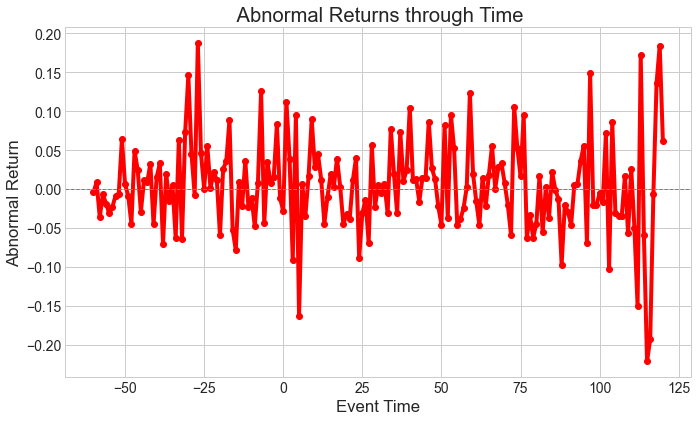

In [601]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = grouped_aar_bullish_btc.index

# Plot abnormal returns 
plt.figure(figsize=(10, 6))
plt.plot(time_array, grouped_aar_bullish_btc, marker='o', linestyle='-', color='r')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(' Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Abnormal Return')
plt.grid(True)
plt.show()

# Bearish Bitcoin events

In [167]:
#We connstruct a data frame with the estimation window
bearish_bitcoin_estimation_window = combined_bearish_bitcoin[
    (combined_bearish_bitcoin['Event Time'] >= -300) &
    (combined_bearish_bitcoin['Event Time'] <= -60)
]
#We use the Mean return model over the estimation window to find the mean pourcentage return for each cluster
mean_returns_estimation_window = bearish_bitcoin_estimation_window.groupby('Cluster')['Percentage_Return'].mean()

In [168]:
# Map the cluster variances to the corresponding clusters in the DataFrame
mean_returns= mean_returns_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
combined_bearish_bitcoin['Mean Returns'] = combined_bearish_bitcoin['Cluster'].map(mean_returns)

In [169]:
#We compute the abnormal returns as: Actual returns in % - Expected returns in % 
combined_bearish_bitcoin['Abnormal returns']= combined_bearish_bitcoin['Percentage_Return']-combined_bearish_bitcoin['Mean Returns']

In [170]:
#We construct a data frame with the event window
filtered_combined_bearish_bitcoin = combined_bearish_bitcoin[
    (combined_bearish_bitcoin['Event Time'] >= -60) &
    (combined_bearish_bitcoin['Event Time'] <= 120)
]

In [171]:
grouped_data = combined_bearish_bitcoin.groupby('Event Time')['Abnormal returns']

# Define a function to perform the Wilcoxon signed-rank test against 0 for a group
wilcoxon_test = lambda grouped_data: stats.wilcoxon(grouped_data).pvalue

# Apply the Wilcoxon test function to each group and get the p-value against 0
result_bearish = grouped_data.apply(wilcoxon_test)
result_bearish[0:10]

Event Time
0.0     0.5
1.0     1.0
2.0     1.0
3.0     1.0
4.0     0.5
5.0     1.0
6.0     1.0
7.0     1.0
8.0     0.5
9.0     1.0
10.0    1.0
Name: Abnormal returns, dtype: float64

In [172]:
grouped_aar4 = filtered_combined_bearish_bitcoin.groupby('Event Time')['Abnormal returns'].mean()
grouped_aar4.head()

Event Time
-60.0   -0.013158
-59.0    0.047524
-58.0   -0.000131
-57.0   -0.025228
-56.0    0.166245
Name: Abnormal returns, dtype: float64

In [173]:
#We now get the t-stat for each abnormal return 
#To do that we first have to compute the variance that will be considered as the variance of the expected return over the estimation window
variance_estimation_window = bearish_bitcoin_estimation_window.groupby('Cluster')['Percentage_Return'].var()
variance_estimation_window

#Then we map the variance in the dataframe for the event period -60 to 120 
# Map the cluster variances to the corresponding clusters in the DataFrame
cluster_variances_map = variance_estimation_window.to_dict()

# Add a new column 'Cluster Variance' to the DataFrame
filtered_combined_bearish_bitcoin['Cluster Variance'] =filtered_combined_bearish_bitcoin['Cluster'].map(cluster_variances_map)

# Define a function to calculate 'test stat'
def calculate_test_stat(row):
    return row['Abnormal returns'] / np.sqrt(row['Cluster Variance'])

# Apply the function to each row and assign the result to a new column 'test stat'
filtered_combined_bearish_bitcoin.loc[:,'Test stat'] = filtered_combined_bearish_bitcoin.apply(calculate_test_stat, axis=1)

In [174]:
grouped_t4 = filtered_combined_bearish_bitcoin.groupby('Event Time')['Test stat'].mean()
grouped_t4

Event Time
-60.0    -0.292802
-59.0     0.423744
-58.0     0.150020
-57.0    -0.062356
-56.0     1.491078
            ...   
 116.0    0.179617
 117.0    0.204721
 118.0   -0.422153
 119.0    0.020401
 120.0   -0.385928
Name: Test stat, Length: 181, dtype: float64

In [175]:
Results_bearish_btc= pd.DataFrame([grouped_aar4, grouped_t4])
Results_bearish_btc= Results_bearish_btc.transpose()
Results_bearish_btc['p_value'] = 2 * (1 - stats.t.cdf(abs(Results_bearish_btc['Test stat']), 8))

In [176]:
Results_bearish_btc.index = Results_bearish_btc.index.astype(float).astype(int)
Results_bearish_btc.loc[0:60] #Results don't seem to be significant 

,Abnormal returns,Test stat,p_value
Event Time,,,
0,-0.131404,-1.162307,0.278609
1,0.011781,-0.388890,0.707504
2,0.093250,0.696181,0.506035
3,0.017016,0.003636,0.997188
4,-0.120723,-0.971596,0.359707
...,...,...,...
56,-0.094955,-0.991839,0.350323
57,-0.000592,0.217476,0.833281
58,-0.097707,-1.206498,0.262090


In [177]:
varAAR_bearish_btc = Results_bearish_btc['Abnormal returns'].var()
subset_bearish_btc = Results_bearish_btc.loc[0:1]
subset_bearish_btc['Cumulative Abnormal returns'] = subset_bearish_btc['Abnormal returns'].cumsum()
CAR1_bearish_btc = subset_bearish_btc.loc[1, 'Cumulative Abnormal returns']
tCAR1_bearish_btc = CAR1_bearish_btc / np.sqrt(varAAR_bearish_btc * 1)

subset2_bearish_btc = Results_bearish_btc.loc[0:2]
subset2_bearish_btc['Cumulative Abnormal returns'] = subset2_bearish_btc['Abnormal returns'].cumsum()
CAR2_bearish_btc = subset2_bearish_btc.loc[2, 'Cumulative Abnormal returns']
tCAR2_bearish_btc = CAR2_bearish_btc / np.sqrt(varAAR_bearish_btc * 2)

subset5_bearish_btc = Results_bearish_btc.loc[0:5]
subset5_bearish_btc['Cumulative Abnormal returns'] = subset5_bearish_btc['Abnormal returns'].cumsum()
CAR5_bearish_btc = subset5_bearish_btc.loc[5, 'Cumulative Abnormal returns']
tCAR5_bearish_btc = CAR5_bearish_btc / np.sqrt(varAAR_bearish_btc * 5)

subset30_bearish_btc = Results_bearish_btc.loc[0:30]
subset30_bearish_btc['Cumulative Abnormal returns'] = subset30_bearish_btc['Abnormal returns'].cumsum()
CAR30_bearish_btc = subset30_bearish_btc.loc[30, 'Cumulative Abnormal returns']
tCAR30_bearish_btc = CAR30_bearish_btc / np.sqrt(varAAR_bearish_btc * 30)

subset60_bearish_btc = Results_bearish_btc.loc[0:60]
subset60_bearish_btc['Cumulative Abnormal returns'] = subset60_bearish_btc['Abnormal returns'].cumsum()
CAR60_bearish_btc = subset60_bearish_btc.loc[60, 'Cumulative Abnormal returns']
tCAR60_bearish_btc = CAR60_bearish_btc / np.sqrt(varAAR_bearish_btc * 60)

subset120_bearish_btc = Results_bearish_btc.loc[0:120]
subset120_bearish_btc['Cumulative Abnormal returns'] = subset120_bearish_btc['Abnormal returns'].cumsum()
CAR120_bearish_btc = subset120_bearish_btc.loc[120, 'Cumulative Abnormal returns']
tCAR120_bearish_btc = CAR60_bearish_btc / np.sqrt(varAAR_bearish_btc * 120)


In [178]:
CAR_values_bearish_btc = [CAR1_bearish_btc, CAR2_bearish_btc, CAR5_bearish_btc, CAR30_bearish_btc, CAR60_bearish_btc, CAR120_bearish_btc]
tCAR_values_bearish_btc = [tCAR1_bearish_btc, tCAR2_bearish_btc, tCAR5_bearish_btc, tCAR30_bearish_btc, tCAR60_bearish_btc, tCAR120_bearish_btc]
intervals = [1, 2, 5, 30, 60, 120]

# Create a dictionary to store the data for bearish BTC
data_bearish_btc = {
    'Interval': intervals,
    'CAR': CAR_values_bearish_btc,
    'tCAR': tCAR_values_bearish_btc
}

# Create a DataFrame for bearish BTC
CAR_bearish_btc = pd.DataFrame(data_bearish_btc)

# Display the DataFrame
CAR_bearish_btc

# After a bearish event for bitcoin, there seems to be some statistical significance 30 and 60 minutes after the event has occured

,Interval,CAR,tCAR
0,1,-0.119623,-1.766995
1,2,-0.026373,-0.275469
2,5,-0.245098,-1.619108
3,30,-0.932833,-2.515727
4,60,-1.274247,-2.429956
5,120,-2.091956,-1.718238


In [180]:
CAR_values_bearish_btc = []
wilcoxon_p_values_bearish_btc = []  # Initialize the list

intervals = [1, 2, 5, 30, 60, 120]

for interval in intervals:
    subset = Results_bearish_btc.loc[0:interval]
    subset['Cumulative Abnormal returns'] = subset['Abnormal returns'].cumsum()
    CAR = subset.loc[interval, 'Cumulative Abnormal returns']
    
    # Calculate the Wilcoxon test statistic and p-value
    _, p_value = stats.wilcoxon(subset['Abnormal returns'])
    
    CAR_values_bearish_btc.append(CAR)
    wilcoxon_p_values_bearish_btc.append(p_value)

# Create a dictionary to store the data for bearish BTC
data_bearish_btc = {
    'Interval': intervals,
    'CAR': CAR_values_bearish_btc,
    'Wilcoxon p-value': wilcoxon_p_values_bearish_btc
}

# Create a DataFrame for bearish BTC
CAR_wilcoxon_bearish_btc = pd.DataFrame(data_bearish_btc)

# Display the DataFrame for bearish BTC
CAR_wilcoxon_bearish_btc

,Interval,CAR,Wilcoxon p-value
0,1,-0.119623,1.000000
1,2,-0.026373,1.000000
2,5,-0.245098,0.437500
3,30,-0.932833,0.050036
4,60,-1.274247,0.089371
5,120,-2.091956,0.031700


In [179]:
cumulative_abnormal_returns_bearish_btc = Results_bearish_btc['Abnormal returns'].cumsum()

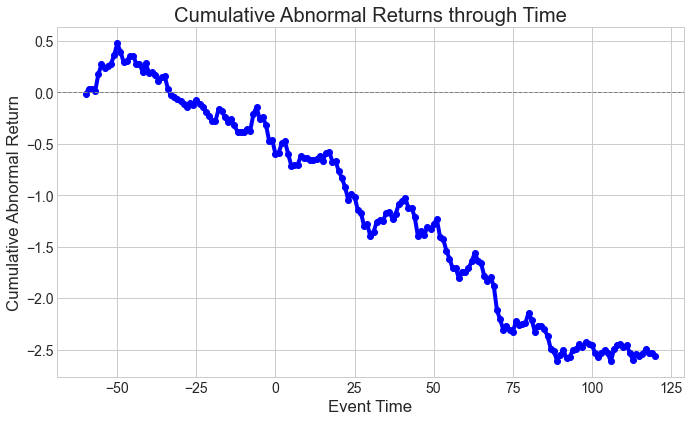

In [614]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = cumulative_abnormal_returns_bearish_btc.index

# Plot cumulative abnormal returns
plt.figure(figsize=(10, 6))
plt.plot(time_array, cumulative_abnormal_returns_bearish_btc, marker='o', linestyle='-', color='b')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Cumulative Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Cumulative Abnormal Return')
plt.grid(True)
plt.show()

In [615]:
grouped_aar_bearish_btc= Results_bearish_btc['Abnormal returns']

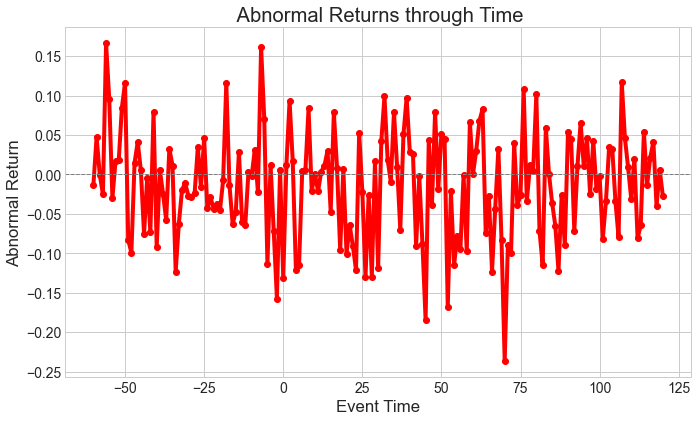

In [616]:
# Create a time array based on the index of the cumulative abnormal returns
time_array = grouped_aar_bearish_btc.index

# Plot abnormal returns 
plt.figure(figsize=(10, 6))
plt.plot(time_array, grouped_aar_bearish_btc, marker='o', linestyle='-', color='r')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title(' Abnormal Returns through Time')
plt.xlabel('Event Time')
plt.ylabel('Abnormal Return')
plt.grid(True)
plt.show()